#7장 선형 모델: 리스크 팩터에서 수익률 예측까지

- 선형모델은 가장 유용한 가설 클래스 중 하나를 나타냄.
- 알고리즘 트레이딩에서 널리 적용되는 많은 머신러닝 알고리즘은 많은 경우 효율적으로 훈련될 수 있고, 상대적으로 잡음이 심한 금융 데이터에 강건하며, 금융이론과 강한 연계가 있기 때문에 선형 예측변수를 필요로 함.  
- 선형 예측 변수는 직관적이고 해석하기 쉬우며 종종 데이터를 합리적으로 잘 적합시키거나 좋은 기준치를 제공

### 선형 모델은 추론과 예측을 목표로 회귀와 분류 문제에 적용됨.

1. 일반화 선형 모델(GLM): 정규 분포 이외의 오차 분포를 암시하는 반응 변수를 허용함으로써 적용의 범위를 확장함. 일반화 선형모델은 분류문제를 나타내는 범주형 반응 변수를 위한 probit 또는 logistic방법론이 포함됨

2. 좀 더 강건한 추정방법(robust estimation method)은 예를 들어 시간에 따른 상관관계나 관측치 간 상관관계로 인해 데이터가 기준 가정을 위반하는 경우 통계적 추론이 가능함. 종종 자산의 유니버스에 대한 과거 수익률과 같은 동일한 단위에 대한 반복된 관측치를 포함하는 패널 데이터인 경우를 말함.

3. 수축방법(Shrinkage method): 선형 모델의 예측 성과를 향상시키는 것을 목표로 함. 모델의 분산을 줄이고 표본 외 예측 성과를 개선시키는 모델에 의해 학습된 계수에 편향이라는 복잡성 패널티를 사용




##추론에서 예측까지
- 선형 회귀 모델은 출력이 입력의 선형 결합이라고 가정
- 각 관측치가 예상 선형 관계에서 벗어나는 것을 허용하는 확룔 오차를 가정
- 모델이 입출력 관계를 완벽하게 설명하지 못하는 이유에는 변수 누락, 측정, 데이터 수집이슈등이 있음

####1. 표본으로부터 추정된 회귀 모수에 근거해 모집단의 실제 선형 관계에 대한 통계적 결론을 이끌어 내려면 오차의 통계적 특징에 관한 가정을 추가해야 함.
- 기본 회귀 모델은 독립적이고 동일하게 분포된 오차를 가정, 이는 공분산 행렬이 오차 분산을 나타내는 상수를 곱한 항등 행렬임을 의미
- 이러한 가정은 최소 자승법(OLS)이 편향이 없을 뿐만 아니라 효율적인 추정치를 제공한다는 것을 보장하며 가장 낮은 표본 오차를 달성한다는 것을 의미하나 실제로는 잘 충족되지 않음

####2. 금융에서는 종종 주어진 횡단면에서 반복되는 관측치를 가진 패널 데이터를 접하게 됨
- 시간 경과에 따른 일련의 리스크 팩터에 대한 자산 유니버스의 노출을 체계적으로 평가하려는 시도는 전형적으로 시간 또는 횡단면 차원, 혹은 둘 모두의 상관관계를 나타냄
- 따라서 항등 행렬의 배수보다 더 복잡한 오차 공분산 행렬을 가정하는 학습 알고리즘이 등장

####3. 선형 모델에 편향 있는 파라미터를 학습하는 방법은 더 낮은 분산을 가진 추정치를 산출하므로 예측 성과를 개선
- 수축 방법은 선형 목적 함수에 패널티 항을 추가하는 규제화를 적용해 모델 복잡성을 감소시킴

- 패널티는 계수의 절대적 크기에 양의 관련성이 있어 이러한 계수는 기준 사례에 비례해 수축됨.

- 더 큰 계수는 입력 변화에 더 강하게 반응하는 더 복잡한 모델을 의미

- 적절하게 보정된 페널티는 최적의 편향 분산 트레이드오프가 제시하는 것 이상으로 모델 계수의 성장을 제한할 수 있음



## **베이스라인 모델: 다중 선형 회귀 모델**

---





###1. 모델을 만드는 방법
- 다중 회귀 모델(multiple regression): 하나의 연속 결과 변수와 어떤 유형이든 가능하지만 전처리가 필요한 입력 변수 p사이의 선형 함수 관계

- 다변량 회귀(multivariate regression): 다중 입력 변수에 대한 다중 출력의 회귀 분석

####1)모집단에서 선형 회귀 모델
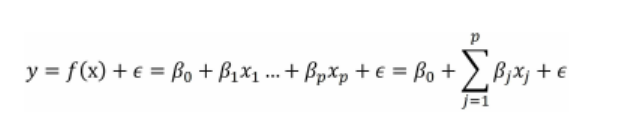



- 출력 y의 단일 사례, 입력 백터 Xt = (x1,,,xp), 오차 e

- 계수 Bi : 다른 모든 변수가 일정하게 유지될 때 출력에 대한 변수 xi의 부분적 평균효과

2) 행렬 형태

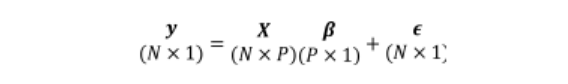

- y는 N개의 출력 관측치로 구성된 벡터
- X는 p변수에 대한 관측치 N행에 더해 상수항에 대한 1s의 열을 가진 계획행렬
- B는 P=p+1 계수 B0,,,,Bp를 포함하는 벡터

- 이 모델은 p+1 파라미터에서 선형이지만 다항식 기반 확장이나 로그 항을 포함한 변수를 선택하거나 변환해 비선형 관계를 모델링할 수 있음
- 또한 더미 인커딩으로 범주형 변수를 사용할 수 있고, xixj형식의 새로운 입력 변수를 생성해 변수 간 상호작용을 포함할 수 있음


###2. 모델을 훈련하는 방법
데이터에서 모델 파라미터(모델 모수)를 학습할 떄 사용할 수 있는 방법: 최소 자승법(OLS), 최대 우도 추정(MLE), 확률적 경사 하강법(SGD)

####1) 최소 자승법(OLS): 초평면을 데이터에 맞추는 방법
- 입력 데이터로부터 출력에 가장 근접한 초평면의 파라미터를 학습하기 위한 방법
- 최적의 근사값: 출력값과 모델이 나타내는 초평면 사이의 제곱거리 합 최소화(잔차 제곱합을 최소화)
- 잔차 제곱합을 최소화 하기 위한 계수 벡터 B를 선택
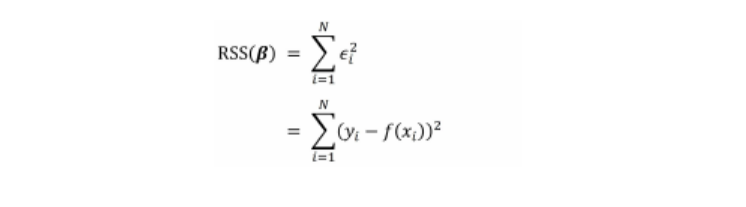






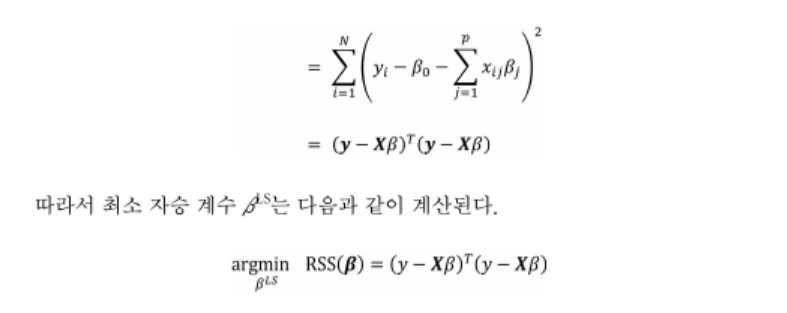

- RSS를 최소화하는 최적 파라미터는 앞선 표현식의 B에 관해 도함수를 0으로 설정한 결과물
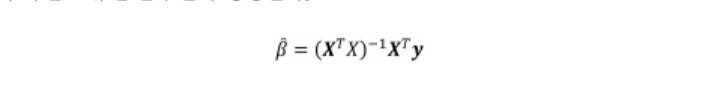

-RSS를 최소화 하는 계수는 잔차 벡터 y-y^가 X열에 의한 확장된 R^p의 하위 공간에 직교이고, 추정치 y^은 해당 하위 공간에 대해 직교 투영됨

####2) 최대 우도 추정(MLE: Max imum Likelihood Estimation)
- 모델 파라미터의 함수로써 주어진 두 입력 데이터에 대한 출력값 표본을 관찰하는 가능성을 계산하는 우도함수에 의존
- 우도는 0에서 1까지의 범위에서 정규화되지 않는다는 점에서 확률과 다름
- 표준 정규 분포와 같은 오차 항에 대한 분포를 가정하여 선형 회귀 예제에 대한 우도 함수 설정 가능
- MLE의 목표는 주어진 입력을 취하면서 관측된 출력 표본의 확률을 최대화하는 모델 파라미터를 선택하는 것


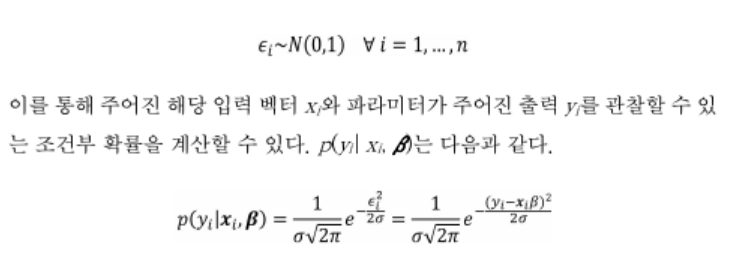

- 입력값이 주어졌을 때 출력값이 조건부 독립이라 가정하면, 표본의 우도는 개별 출력 데이터 포인트의 조건부 확률의 곱에 비례
- 곱보다 합을 취하는 것이 쉬우므로 로그를 취해 로그 우도 함수를 얻음

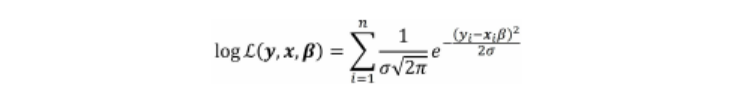

- MLE파라미터 추정치는 로그 우도 함수를 최대화하여 얻음

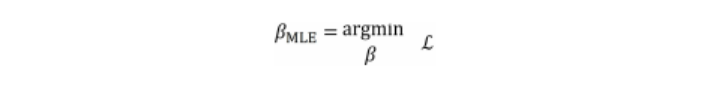

- 정규 분포 오차를 가정하기 때문에 로그 우도 함수를 최대화하면 최소제곱과 동일한 파라미터 솔루션이 생성됨
- 이는 파라미터에 의존하는 유일한 표현식이 지수의 잔차 제곱이기 때문
- 다른 분포 가정과 모델의 경우 MLE는 다른 결과를 산출
- 결과는 베르누이 분포를 따름
- MLE는 대부분의 경우 최소제곱법을 적용할 수 없어 더 일반적인 추정 방법이 됨


####3) 경사하강법(Gradient Descent): 부드러운 함수의 정지 점을 찾는 범용 최적화 알고리즘
- 목적 함수가 볼록인 경우 솔루션은 전역 최적화가 됨
- 경사하강법의 변형은 신경망 훈련, MLE 문제의 솔루션을 위한 계산에서도 사용됨
- 알고리즘은 목적 함수의 기울기를 사용
- 함수 값의 최대 변화는 그래디언트 자체 방향으로의 스텝에서 비롯됨


- 예시: 단일 변수 x와 볼록 함수 f(x)에 대한 프로세스
- 최솟값 x0를 찾음 -> 함수의 기울기가 음수인 경우 경사 하강은 x0에 대한 목표값을 증가시키고 그렇지 않은 경우 값을 감소시킴

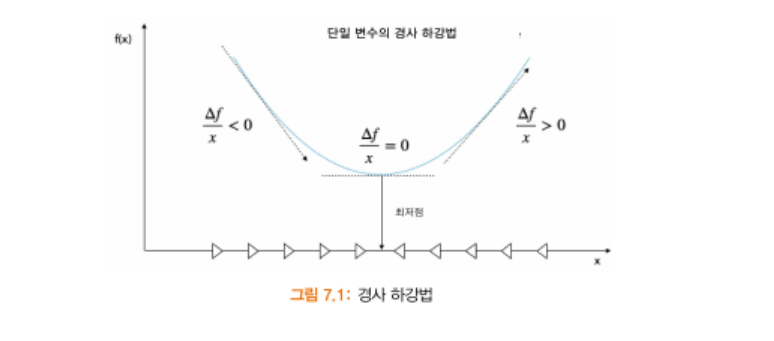




- 예를 들어 예측 오차의 비용을 설명하는 함수를 최소화할 때 알고리즘은 훈련 데이터를 사용해 현재 파라미터의 값의 기울기를 계산하고, 대응하는 그래디언트 요소의 음수 값에 따라 파라미터를 수정
- 결과적으로 목적함수는 더 낮은 값을 가정하고 파라미터는 점차 솔루션에 더 가깝게 이동
- 그래디언트가 작아지면 최적화는 중단되고, 파라미터 값은 거의 변하지 않음
- 스텝의 크기는 학습률이 되며, 이는 조정이 필요한 중요 파라미터임
- 학습률에 대한 옵션을 포함하는 많은 구현은 반복 횟수에 따라 점차 증가
- 데이터의 크기에 따라 알고리즘은 전체 데이터 세트에 대해 여러 번 반복 될 수 있고 이러한 각각의 반복을 에폭(epoch)이라 부름
- 추가 반복을 중지하는데 사용되는 에폭의 수와 허용도는 추가 하이퍼파라미터임
- 확률적 경사하강법(SGD)은 속도 향상을 위해 평균이 아닌 무작위로 데이터 포인터를 선택, 이에 대한 그레디언트를 계산함


###3. 가우스-마르코프 정리
- 모델의 통계적 속성을 평가하고 추론을 실행하려면 잔차에 대한 가정 필요
- 잔차: 모델이 정확히 맞지 않거나 설명할 수 없는 입력 데이터의 부분
- 가우스-마르코프 정리(GMT): 모델 파라미터 B의 불편 추정치를 생성하는 데 최소 자승법(OLS)이 필요한 가정과 이러한 추정치가 횡단면 데이터에 대해 모든 선형 모델 중 가장 낮은 표준 오차를 갖는 경우를 정의

####1) 기존 다중 회귀 모델의 GMT가정
- 모집단에서 선형식은 y = B0 + B1Xx + ... + BkXx + e 상태를 유지(Bi는 상수, e는 확률 오차)
- 입력 변수에 대한 데이터 x1,,xk는 모집단에서 추출한 확률 표본
- 완전 공선성은 없음(입력 변수 사이에 정확한 선형 관계 없음)
- 오차 e는 어떤 업력은 하더라도 0의 조건부 평균을 가즘 ( E[e1,,,xk] =0) -> 입력 변수와 관련된 누락된 변수가 존재하지 않음을 의미
- 등분산성: 오차 항 e는 입력 변수에 따라 일정한 분산을 가짐



- 첫 4개의 가정하에 OLS방법은 불편 추정치를 제공
  - 관련이 없는 변수를 포함하면 절편 및 기울기 추정치가 편향되지 않지만 관련 변수를 생략하면 편향된 모수 추정치가 됨
- 첫 4개의 가정하에 OLS는 일관성이 있다.
  - 표본 크기가 증가하면 표준 오차표는 임의적인 것이 돼 추정치가 실제 값으로 수렴됨
  - (불행히도 반대의 경우도 사실임)
  - 모델이 관련 변수를 놓치거나 함수 형식이 잘못돼 오차의 조건부 기대가 0이 아닌 경우 모든 모수 추정치는 편향됨
  - 오차가 입력 변수와 상관돼 있는 경우 OLS는 일관성이 없으며 더 많은 데이터를 추가해도 편향이 제거 되지 않음

- 5번째 가정을 추정하면 OLS는 최량 선형 불편 추정량(BLUE)를 산출
  - BLUE: 선형이고 불편인 추정량 중 가장 효율적인 추정
  - best라는 것은 추정치가 모든 선형 추정치 중 가장 낮은 표준 오차를 가짐을 의미

- 5가지 가정이 유지되고 통계적 추론이 목표라면 OLS 추정은 올바르나, 목표가 예측인 경우 일부 우수한 예측 성능을 위해 편향을 절충하는 다른 추정치가 존재함



###4. 통계적 추론을 수행하는 방법


- 선형 회귀에서의 추론은 표본 데이터로부터 모집단의 참 관계에 대한 결론 도출을 목적으로 함
- 신뢰구간 추정, 전체 관계에 대한 유의성, 특정 계수 값에 대한 가설 검증을 포함
- 검정통계량(test statistic) : 통계적 추론의 핵심, 일반적으로 회귀계수와 같은 관심 숫자에서 계산됨
  - 이 통계량에 대한 귀무가설을 공식화하고 가설이 정확하다는 가정하에 표본이 주어진 경우, 이 통계량에 대한 실제 값을 관찰할 확률을 계산할 수 있음
  - 이 확률을 일반적으로 p-값이라 함
  - 유의 수준 임곗값 아래로 떨어지면 검정 통계량에 대해 관측한 값의 가능성이 매우 낮기에 가설을 기각함
  - 반대로 p-값이 실제로 올바른 가설을 기각할 때 우리가 틀릴 확률을 반영

- 다섯가지 GMT가정 외에도 고전적인 선형 모델은 정규성을 가정
  - 모집단 오차는 정규 분포를 따르고 입력 변수와 독립적
  - 이는 출력 변수가 입력 변수에 따라 정규 분포를 따른다는 것을 의미
  - 이를 통해 계수의 정확한 분포를 도출할 수 있으며, 이는 다시 작은 표본의 정확한 가설 검증에 필요한 검정 통계량의 정확한 분포를 암시해줌
  - 이러한 가정은 실패하는 경우가 많음(ex.자산 수익률은 정규분포를 따르지 않음)

- 그럼에도 정규성하에서 사용되는 검정 통계량은 정규성이 유지되지 않는 경우에도 근사적으로 유효함을 보임
  - GMT 가정 1~5에서 정규성이 유질될 때 검정 통계량의 분포적 특징
    - 파라미터 추정치는 다변량 정규분포를 따름
    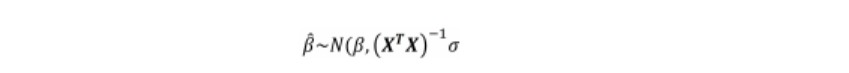
    - GMT 1~5에서 모수 추정치는 이미 불편이고, 다음 식을 사용해 일정한 오차 분산을 갖는 불평 추정치를 얻을 수 있음
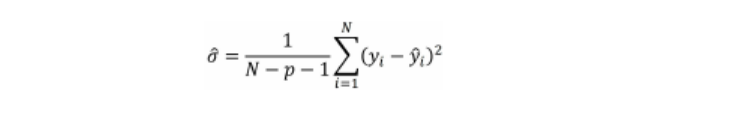
  - 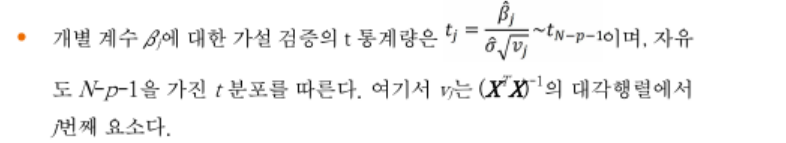

    - t분포는 정규 분포로 수렴되며 정규 분포의 97.5분위수는 1.96이므로 모수 추정치의 95% 신뢰 구간에서 유용한 어림 법칩(rule of thumb)는 B^+- 2se(B^)이다. 0을 포함하는 구간은 실제 모수가 0이므로 모델과 관련이 없다는 귀무가설을 기각할 수 없음을 의미
    - F 통계량은 전체 회귀가 유의한지 여부를 포함해 여러 모수에 대한 제한 검정을 허용. 추가 변수로 인한 RSS의 변화(감소)를 측정
    - 라그랑지 승수 검증은 다중 제약을 테스트하기 위한 F검증의 대안

###5. 문제를 진단하고 해결하는 방법
- 진단은 결과를 해석하고 통계적 추론을 수행할 때 모델의 가정을 검증하고 잘못된 결론을 방지함
- 적합도 측정과 오차 항에 관한 가정의 다양한 검증이 포함되며, 잔차가 정규 분포와 얼마나밀접하게 일치하는지가 포함됨
- 진단은 잔차 분산이 실제로 일정한지, 이분산성을 보이는지 평가
- 또, 오차가 조건부로 무상관성을 갖거나 계열 상관을 보이는지, 즉 하나의 오차를 아는 것이 연속적인 오차를 예측하는 데 도움이 되는 지를 검정
- 진담 검증 외에도 잔차를 시각적으로 검사해야함
  - 모델에 결과를 유발하는 하나 이상의 팩터가 누락됐음을 나타내는 무작위 잡음과 반대로 체계적 패턴을 반영하는지 여부를 감지하는 데 도움이 됨
  

####1) 적합도(Goodness-of-fit): 모델이 결과의 변동을 얼마나 잘 설명하는지 평가
- 적합도 지표는 적합치를 측정하는 방법에 따라 다음. 여기서는 표본 내 지표에 초점을 맞춤(예측 모델에 초점을 두어 표본 외 검증과 교차 검증을 사용)

- 좋은 적합도 측도는 최소 자승추정에 기반을 두고 최대가 돼야 하는 결정계수 R^2이 포함됨
  - R^2 모델에 의해 설명된 결과 데이터의 변동 비율을 측정하고 다음과 같이 R^2 = 1-(RSS/TSS)로 계산됨 (TSS =  평균에서 결과의 제곱 편차., 실제 결과값과 모델에 의해 추정된 값 사이의 제곱 상관계수에 해당)
  - 목표는 R^2을 최대화하는 것이지만 모델이 더 많은 변수를 추가할수록 감소하지 않아 과대적합이 조장됨
  - 조정된 R^2은 더 많은 변수를 추가한 R^2에 패널티를 적용 -> 각각의 추가 변수는 더 나은 적합도를 산출하고자 RSS를 크게 줄일 필요가 있음

- 대안으로 아카이케 정보 가진(AIC)과 베이지안 정보 기준(BIC)은 최대 우도 추정을 기반으로 하여 최소화 됨
  - AIC = -2log(L*)+2k (L*= 최대 우도 함수의 값, k=파라미터의 수)
  - BIC = -2log(L*) + log(N)^k (N= 표본 크기)
  - 두 측정법 모두 복잡성에 대해 불이익을 줌( BIC는 더 높은 패널티를 적용해 과소적합될 수 있지만 AIC는 상대적으로 과대적합될 수 있음)
  - AIC는 잘 알려지지 않은 데이터 생성 프로세스를 가장 잘 설명하는 모델을 찾는 것을 목표
  - BIC는 후보군에서 최고의 모델을 찾으려고 함
  - 두 기준은 목표가 표본 내 적합일 때 함께 사용해 모델 선택을 안내 받을 수 있고, 그렇지 않은 경우 교차 검증과 일반화 오차 추정에 기반을 둔 선택이 선호됨
  


####2) 이분산성: 잔차 분산이 일정하지 않고 관측치에 걸쳐 다른 경우에 발생
- GMT가정 5는 잔차 공분산, 즉 오차 항의 상수 분산과 동일한 항목을 갖는 대각행렬이 필요
- 잔차 분산이 입력 변수와 양의 상관을 보일 경우, 즉 평균으로부터 거리가 먼 입력값에 대해 오차가 큰 경우 OLS 표준 오차 추정지는 너무 낮게 됨 -> t통계량은 부풀려져 실제 존재하지 않는 관계에 대한 잘못된 발견으로 이어짐
- 진단은 잔차의 육안검사로 시작. 임의로 추정되는 잔차의 체계적인 패턴은 오차가 다양한 대안에 대해 동질적이라는 귀무가설을 통계적으로 검증하는 것 -> 브로쉬-파간, 화이트 검증 포함
  - 조정된 표준 오차는 소위 샌드위치 추정치를 사용해 오차 분산을 계산할 때 이분산성을 고려함
  - 클러스터링된 표준오차는 데이터가 동질적으로 구변되는 그룹에 있다고 가정한지만 오차 분산은 그룹마다 다름. 이러한 그룹은 다른 업종에서 자산 분류나 주식으로 분류될 수 있음

- OLS에 대한 몇가지 대안은 다음과 같은경우에 서로 다른 가정을 사용해 오차 공분산 행렬을 추정
  - 가중 최소 자승법(WLS): 공분산 행렬이 OLS와 같이 대각선 항목만 포함하는 이분산 오차의 경우 이제 항목이 변경될 수 있음
  - 달성 가능한 일반화 최소 자승법(GLSAR): 자기 회귀 AR(p)과정을 따르는 자기상관된 오차에대해 사용
  - 일반화 최소 자승법(GLS): 임의 공분산 행렬 구조의 경우 이분산성이나 계열 상관이 존재하는 경우에 효율적이고 불편성이 없는(치우치지 않은) 추정치를 산출


####3) 계열 상관: 선형 회귀 분석으로 생성된 연속적인 잔차에 상관관계가 있다는 것을 의미
- 이는 4번째 GMT가정을 위반
  - 양의 계열 상관은 표준 오차가 과소 추정되고 t통계량이 부풀려저 무시될 경우 잘못된 발견으로 이어짐
  - 그러나 표준 오차를 계산할 때 계열 상관을 정확히 교정하는 절차가 있음

- 더빈-왓슨 통계은 계열 상관을 진단
  - OLS잔차가 자기 회귀 과정을 따르는 대안에 대해 자기 상관이 없다는 가설을 검증
  - 검정 통계량은 0~4이며, 2에 가까운 값은 자기 상관이 없음을 의미, 값이 작을수록 양의 자기상관 / 값이 클수록 음의 자기상관


####4) 다중 공선성: 두 개 이상의 독립 변수가 높은 상관관계를 가질 때 발생

- 다중 공선성으로 인한 문제
  - 종속 변수에 영향을 미치는 팩터 결정이 어려워짐
  - 개별 p-값은 오인의 여지가 있음. 실제로 변수가 중요하더라도 p-값은 높은 수 있음
  - 회귀 계수에 대한 신뢰 구간은 0을 포함하더라고 지나치게 과도해질 수 있으므로 결과에 대한 독립변수의 영향을 결정하는 데 복잡함

- 다중 공선성을 교정하는 공식이나 이론적 해결책은 없으나 하나 이상의 상관된 입력 변수를 제거하거나 표본 크기를 증가시키는 방법이 있음


## **실제로 선형 회귀를 실행하는 방법**

---
linear_regression_intro.ipynb는 단순 및 다중 선형 회귀를 보여줌
- 다중 선형 회귀는 OLS와 경사하강법을 모두 사용, -50~+50 범위를 갖는 두 개의 임의의 입력 변수 x1과 x2를 생성하고 정규성 가정 GMT6를 충족시키고자 입력 변수에 임의 가우시안 잡음의 선형 조합으로 계산된 결과 변수를 생성
- y = 50 + x1 + 3x2 + e, e~N(0,50)


In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

#Simple Regression

## Generate random data

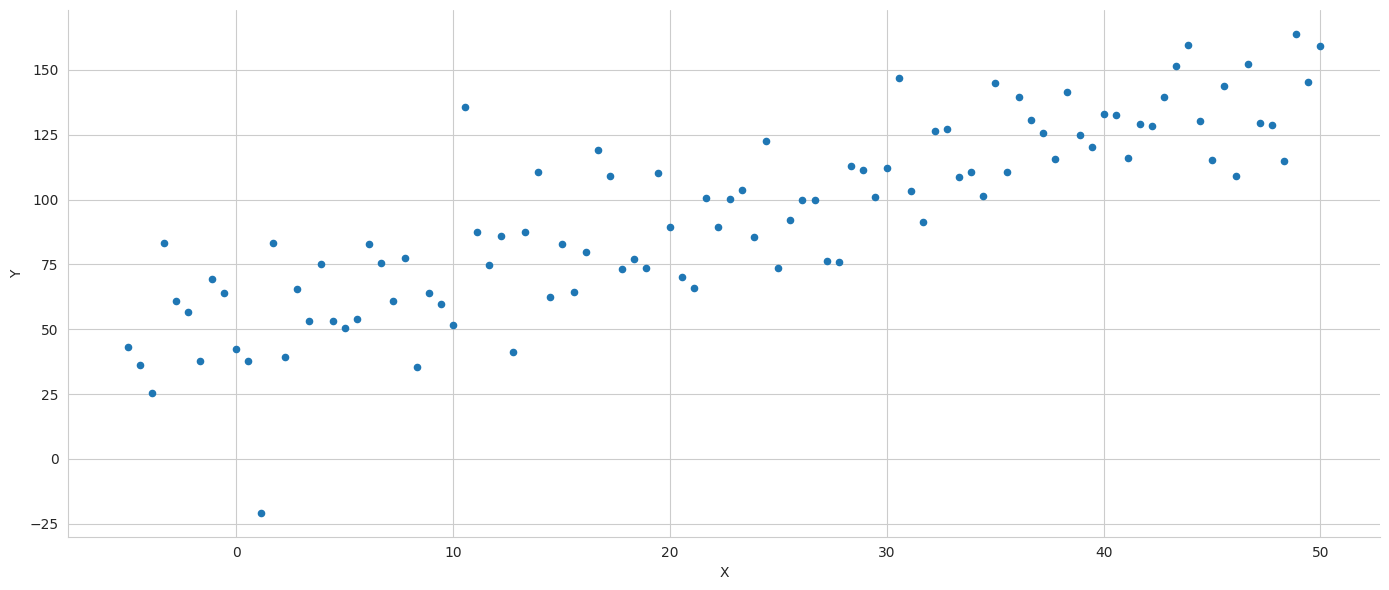

In [ ]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

- 왼쪽에 단일 독립 변수가 있는 선형 모델은 다음과 같은 형태를 가정합니다:
  - y = B0 + B1X1 + e

- 데이터가 실제로 직선에 맞지 않을 때 발생하는 편차 또는 오류를 설명합니다. e는 실제 데이터에 대해 이 유형의 모형을 실행할 때 측정된다.

### 통계분석 모형을 사용한 단순 회귀 분석 추정
- 요약의 위쪽 부분은 추정 방법, 관측치 및 매개 변수의 수와 같은 데이터 집합 특성을 표시하고 표준 오차 추정치가 이질성을 고려하지 않음을 나타냅니다.

- 가운데 패널에는 인공 데이터 생성 프로세스를 밀접하게 반영하는 계수 값이 표시됩니다. 요약 결과의 중간에 표시된 추정치는 이전에 도출된 OLS 공식을 사용하여 얻을 수 있음을 확인할 수 있습니다:

In [ ]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.07e-28
Time:                        06:10:09   Log-Likelihood:                -435.92
No. Observations:                 100   AIC:                             875.8
Df Residuals:                      98   BIC:                             881.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8753      3.293     15.752      0.0

###Verify calculation

In [ ]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   51.88
X        1.88
dtype: float64

### DIsplay model & residuals




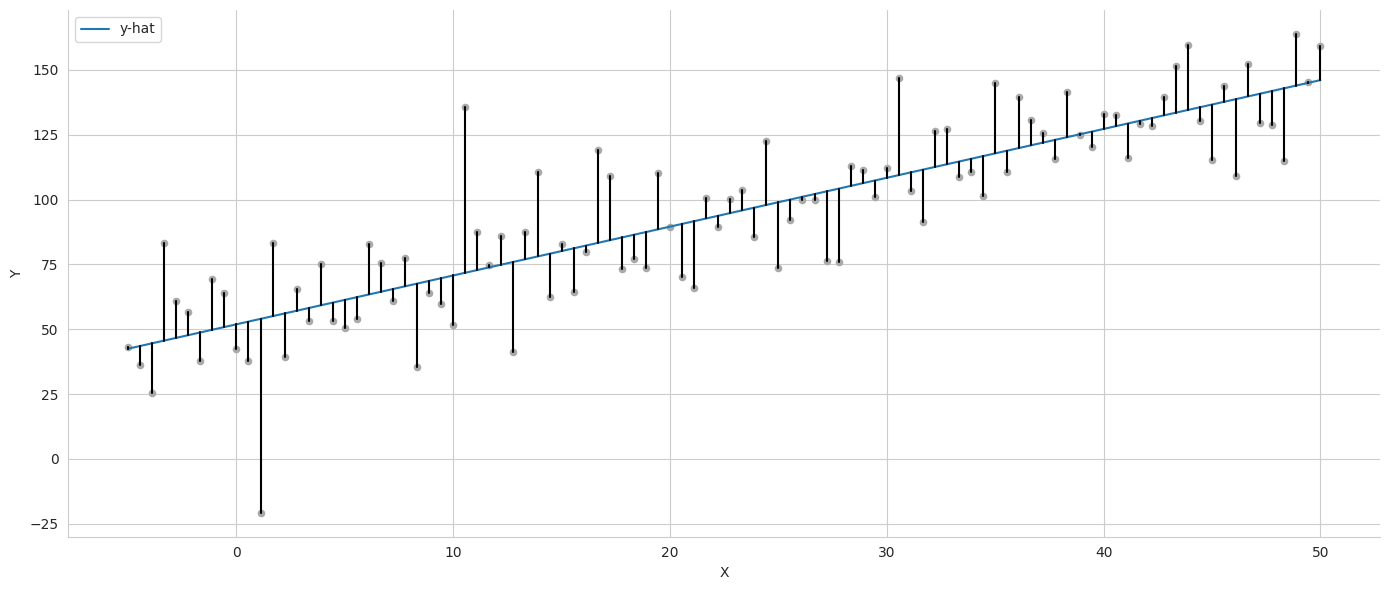

In [ ]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout();

###1. statsmodels를 활용한 최소 자승법
statsmodels라이브러리를 통해 데이터 생성 프로세스를 정확히 반영하는 다중 회귀 모델을 추정

# Multiple Regression
For two independent variables, the model simply changes as follows:
- y = B0 + B1X1 + B2X2 + e

## Generate new random data
무작위로 생성된 데이터 포인트에 적합된 모델 시각화


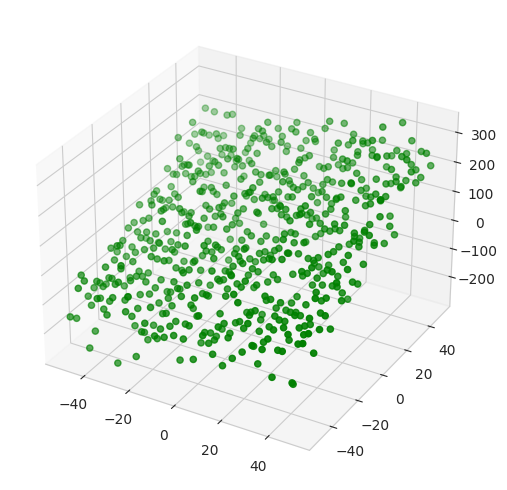

In [ ]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [ ]:
X = data[['X_1', 'X_2']]
y = data['Y']

## Estimate multiple regression model with statsmodels
- 패널의 오른쪽 상단에는 방금 설명한 적합도 측도가 모든 계수가 0이고 관련이 없다는 가설을 기각하는 F-검정과 함께 표시됩니다. 마찬가지로 t-통계량은 절편 및 기울기 계수가 모두 매우 유의하다는 것을 나타냅니다.

- 요약의 하단에는 잔차 진단이 포함되어 있습니다. 왼쪽 패널에는 정규성 가설을 검정하는 데 사용되는 왜도 및 첨도가 표시됩니다.
  - 옴니버스와 재크—베라 검정은 잔차가 정규 분포를 따른다는 귀무 가설을 기각하지 못합니다.
  - 더빈--Watson 통계량은 잔차의 직렬 상관 관계를 검정하고 2에 가까운 값을 가지며, 2개의 모수와 625개의 관측치가 주어지면 직렬 상관 관계가 없다는 가설을 기각하지 못합니다.

- 마지막으로, 조건 번호는 다중 공선성에 대한 증거를 제공합니다. 입력 데이터를 포함하는 설계 행렬의 최대 및 최소 고유값의 제곱근 비율입니다. 값이 30을 초과하면 회귀 분석에 유의한 다중 공선성이 있을 수 있음을 나타냅니다.

In [ ]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          8.95e-201
Time:                        06:10:11   Log-Likelihood:                -3350.4
No. Observations:                 625   AIC:                             6707.
Df Residuals:                     622   BIC:                             6720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1159      2.065     22.814      0.0

###Verify computation

In [ ]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   47.12
X_1      1.02
X_2      2.99
dtype: float64

### Save output as image

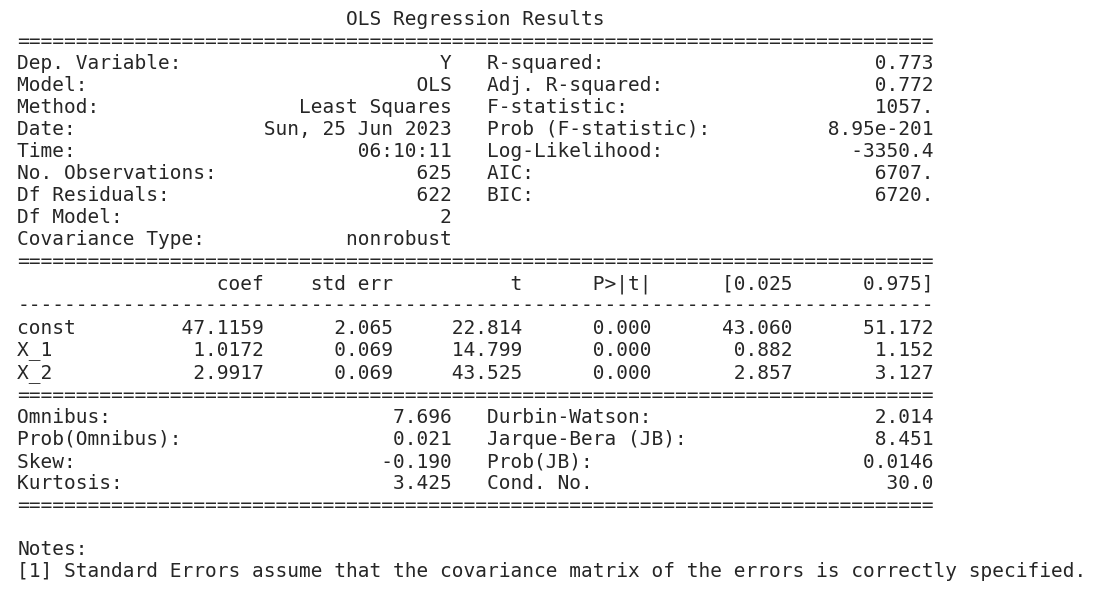

In [ ]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

### Display model & residuals
The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

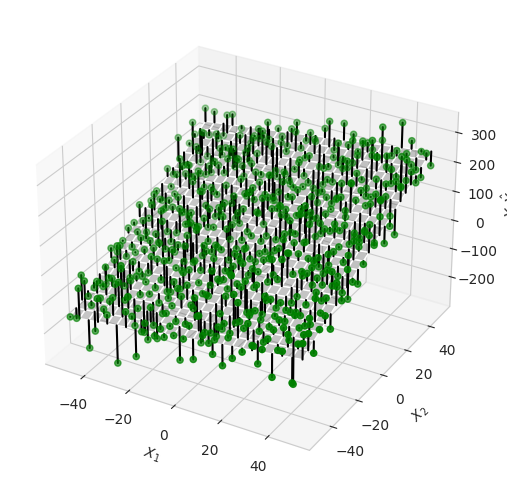

In [ ]:
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

#2. sklearn을 활용한 확률적 경사 하강법(SGD)

#Stochastic Gradient Descent Regression
sklear 라이브러리에는 linear_models 모듈에 SGDRegressor 모델이 포함되어 있습니다. 이 방법을 사용하여 동일한 모델에 대한 매개 변수를 학습하려면 기울기가 척도에 민감하기 때문에 먼저 데이터를 표준화해야 합니다.

###Prepare data
gradient은 스케일에 민감하며 SGD 회귀자도 마찬가지입니다. 표준 축척 또는 축척을 사용하여 형상을 조정합니다.

적합 단계에서 각 입력 변수에 대한 평균과 표준 편차를 계산한 다음 변환 단계에서 평균을 빼고 표준 편차로 나눗셈하는 StandardScaler()를 사용하여 단일 fit_transform() 명령으로 편리하게 수행할 수 있습니다

In [ ]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### Configure SGD Regressor
그런 다음 복제를 용이하게 하기 위해 random_state 설정을 제외한 기본값을 사용하여 SGDRegress를 인스턴스화합니다:

In [ ]:
sgd = SGDRegressor(loss='squared_error',
                   fit_intercept=True,
                   shuffle=True,
                   random_state=42,
                   learning_rate='invscaling',
                   eta0=0.01,
                   power_t=0.25)

### Fit Model
이제 sgd 모델을 적합시키고 OLS 모델과 sgd 모델 모두에 대한 표본 내 예측을 생성하고 각 모델에 대한 루트 평균 제곱 오차를 계산할 수 있습니다:

In [ ]:
#sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

예상대로 두 모형 모두 동일한 결과를 산출합니다. 우리는 이제 선형 회귀를 사용하여 다요소 자산 가격 모델을 추정하는 더 야심찬 프로젝트를 수행할 것입니다.

In [ ]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1     913.40
X_2   2,701.60
dtype: float64

In [ ]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [ ]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   51.51
ols   51.51
dtype: float64

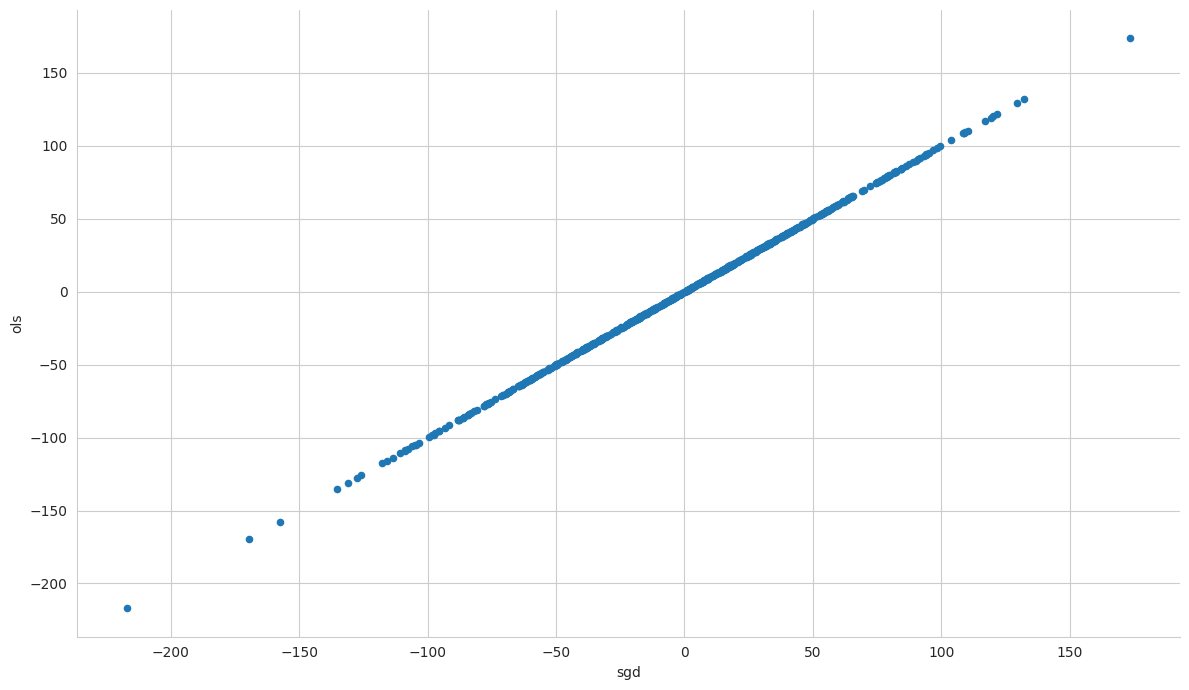

In [ ]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

##선형 팩터 모델을 구축하는 방법


---
- 알고리즘 트레이딩 전략은 이러한 수익률의 주요 동인을 나타내는 리스크의 원천과 자산 수익률 간의 관계를 계량화하고자 팩터 모델을 사용

- 각 팩터 리스크는 프리미엄이 붙으며, 총 자산 수익률은 이러한리스크 프리미엄의 가중평균한 것으로 간주할 수 있음

- 포트폴리오 구축과 자산 선택에서 리스크 관리와 성과 평가까지 포트폴리오 관리 프로세스 전반에 걸쳐 팩터 모델을 실제로 적용할 수 있음. 공통 리스크 팩터가 거래 가능해짐에 따라 팩터 모델의 중요성이 커지고 있음
  - 훨씬 더 적은 수의 팩터로 많은 자산의 수익률을 요약하면 포트폴리오를 최적화할 때 공분산 행렬을 추정하는 데 필요한 데이터양이 줄어듬
  - 이러한 팩터에 대한 자산이나 포트폴리오의 노출 추정치는 리스크 팩터 자체가 거래될 때 적절한 헤지(hedges)를 할 수 있게 해주어 그 결과 리스크의 관리를 할 수 있게 해줌
  - 팩터 모델은 새로운 알파 팩터의 증가된 신호 내용을 평가하게 해줌
  - 팩터 모델은 벤치마크와 비교해 매니저의 성과가 실제로 숙련된 자산 선택 및 시장 타이밍으로 인한 것인지, 포트폴리오가 알려진 수익률을 발생시킨 원인 쪽으로 기울어져 성과가 났는지를 설명하는 데 도움이 됨
    - 오늘날 이러한 동인은 액티브한 운용 수수료가 발생하지 않는 저비용 패시브 운용 펀드로 복제될 수 있음





##1. CAPM에서 파마-프렌치 5 팩터 모델까지
###1) 자본 자산 가격 결정 모델(CAPM)
  -  무위험 이자율 대비 전체 시장의 초과 기대 수익률인 단일 팩터에 대한 개별 익스포저를 사용해 모든 N개 자산의 기대 수익률을 설명함에 따라 계량 모델의 핵심 요소가 되어 옴
  - CAPM모델은 다음과 같은 선형 형태를 취함
    - E[ri] = ai + rf + Bi(E[rm]-rf)

- 이론적 근거: 전체적으로 투자자가 분산을 통해 체계적인 리스크를 제거할 수 없다
  - 따라서 균형 상태에서 체계적인 리스크에 상응하는 자산 보유에 대한 보상 필요
  - 이 모델은 가격이 공개된 모든 정보를 즉시 반영하는 효율적인 시장을 감안할 때 리스크 조정 수익률은 더 우수하지 않아야 하며 값이 0이돼야 한다는 것을 암시

- 모델에 대한 실증적 테스트는 선형 회귀를 사용하며, 예를 들어 소규모 디업에 대한 높은 수익률과 같이 전체 시장 노출에 의존하지 않는 더 나은 리스크 조정 수익률의 형태로 이례 현상(anomaly)을 확인하게 됌

- 이러한 실패는 효율적 시장인지 또는 결합 가설의 단일 팩터 측면이 비난받아야 하는지에 대한 논쟁을 불러일으켰고 다음과 같은 두가지 전제 조건 모두 잘못된 것으로 판명
  - Joseph Stiglitz: 시장이 일반적으로 완벽하게 효율적이지 않다. 시장이 효육적이라면 정보는 이미 가격에 반영돼어 있기에 데이터를 수집할 가치가 없음. 그러나 정보 수집을 위한 인센티브가 없다면 이미 가격에 어떻게 반영돼야 하는지 알기 어려움
  - CAPM에 대한 이론적 및 실증적 개선 사항은 이전에 언급한 이례현상 중 일부를 설명하는 데 추가 팩터가 된다는 것을 시사하며, 이는 다양한 멀티팩터 모델이 만들어지는 계기가 됨



###2) 차익 거래 가격 결정 이론(APT)
- 스티븐 로스는 1976년 시장 효율성을 피하면서 여러 리스크 팩터를 허용하는 대안을 제시
- CAPM과 다르게 잘못된 가격 결정으로 더 나은 수익률이 발생할 기회가 있지만 빠르게 차익이 사라짐을 가정
- 리스크 프리미엄의 변화나 이자율의 기간 구조 뿐 아니라 인플레이션과 산업 생산의 변화가 가장 중요한 것이라 제시


###3) 파마-프렌치 5 팩터 모델
- 단일 CAPM 리스크 원천에 기업의 상대적 규모, 가치, 이익, 투자 수준을 포함해 그 사이의 기간 동안 상당한 유의성이 있음을 밝힘
- 파마-프렌치 리스크 팩터는 주어진 리스크 팩터를 반영하는 메트릭에 따라 높은 값이나 낮은 값을가진 다양한 포트폴리오에 대한 수익률 차이로 계산 됨.
- 이러한 수익률은 메트릭에 따라 주식을 정렬한 다음 특정 백분위수 이상의 주식을 매수하고 특정 백분위수 미만의 주식을 매도함으로써 얻을 수 있음
- 리스크 팩터와 관련된 매트릭
  - 기업 규모 : 시장 지분(ME)
  - 가치 : 주식의 장부가치(BE)를 ME로 나눈 값
  - 영업 수익성(OP) : 매출/자산 판매에서 비용을 뺀 금액
  - 투자 : 투자/자산

- 팩터 및 주성분 분석을 사용해 데이터 기반 리스크 팩터의 발견을 위한 비지도학습 기법이 있음


####리스크 팩터 입수

In [ ]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Imports & Settings
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

###Get Data
Fama와 French는 웹 사이트를 통해 최신 위험 요소 및 연구 포트폴리오 데이터를 제공하며, pandas_datareader 패키지를 사용하여 데이터를 얻을 수 있습니다.


###Risk Factor
- 주식 분류에 사용하는 파마-프랜치5 팩터 모델을 사용
- 주식을 3개의 규모별 그룹으로 먼저 분류한 다음 나머지 3개의 기업 고유 팩터에 대해 각각  2 개로 분류함

- 그런 다음 기업 규모와 시장 장부가 비율, 기업 규모와 영업 이익, 기업 규모와 투자로 정렬한 3 x 2 형태의 가치 가중 포트폴리오 3개 세트가 포함됨

- 포트폴리오의 평균 수익률로 계산된 리스크 팩터 값은 다음 표로 요약

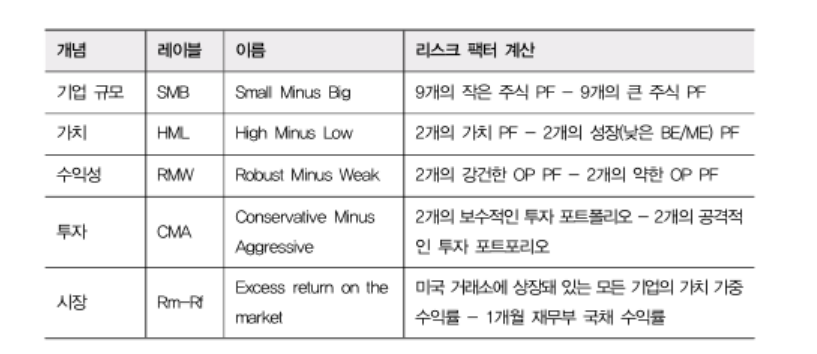

- Fama-French 5가지 요소는 규모 및 장부 대 시장에 따라 형성된 6가지 가치 가중치 포트폴리오, 규모 및 영업 수익성에 따라 형성된 6가지 가치 가중치 포트폴리오, 규모 및 투자에 따라 형성된 6가지 가치 가중치 포트폴리오를 기반으로 합니다.

- 2010-2017년 기간 동안 얻은 월별 수익률은 다음과 같습니다:

In [ ]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [ ]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.16,0.06,-0.05,0.13,0.05,0.01
std,3.58,2.30,2.20,1.58,1.41,0.02
min,-7.89,-4.58,-4.70,-3.88,-3.24,0.00
25%,-0.92,-1.67,-1.67,-1.08,-0.95,0.00
50%,1.23,0.20,-0.28,0.21,0.01,0.00
75%,3.20,1.58,1.21,1.23,0.93,0.01
max,11.35,7.04,8.19,3.48,3.69,0.09


###포트폴리오
Fama와 French는 또한 주어진 기간 동안 시장에서 이용 가능한 위험 프리미엄의 가치뿐만 아니라 팩터 노출의 추정을 설명할 수 있는 다양한 포트폴리오를 제공합니다. 우리는 17개 산업 포트폴리오로 구성된 패널을 월간 빈도로 사용할 것입니다.

- 팩터 모델이 초과 수익률과 함께 작동하므로 수익률에서 무위험 이자을 뺍니다:

In [ ]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


#Fama-Macbeth Regression
위험 요인과 포트폴리오 수익률에 대한 데이터를 고려할 때 포트폴리오의 노출, 즉 위험 요인이 포트폴리오 수익률을 얼마나 견인하는지, 주어진 요소에 대한 노출의 가치가 얼마나 되는지, 즉 시장의 위험 요인 프리미엄이 얼마인지를 추정하는 것이 유용합니다. 위험 프리미엄은 요인 노출이 알려져 있거나 추정될 수 있는 경우 포트폴리오의 수익을 추정할 수 있게 합니다.

In [ ]:
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [ ]:
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


- 잔차의 상관 관계로 인한 추론 문제를 해결하기 위해 Fama와 MacBeth는 요인에 대한 수익의 단면 회귀를 위한 2단계 방법론을 제안했습니다. 2단계 Fama-Macbeth 회귀 분석은 시장에서 특정 위험 요소에 노출되었을 때 보상되는 보험료를 추정하기 위해 고안되었습니다. 두 단계는 다음과 같이 구성됩니다:

  - 첫 번째 단계: 요인 적재를 추정하기 위해 요인에 대한 초과 수익의 N개의 시계열 회귀 분석입니다.

  - 두 번째 단계: 위험 프리미엄을 추정하기 위해 각 기간에 하나씩, T 단면적 회귀 분석을 수행합니다.

- 자세한 내용은 거래를 위한 기계 학습 7장의 해당 섹션을 참조하십시오.

- 이제 우리는 요인 위험 전제를 시간 평균으로 계산하고 위험 전제 추정치가 시간에 따라 독립적이라는 가정을 사용하여 개별 유의성을 평가하기 위해 t-통계를 얻을 수 있습니다.

- 거래된 위험 요인에 대한 매우 크고 대표적인 데이터 샘플이 있는 경우, 샘플 평균을 위험 프리미엄 추정치로 사용할 수 있습니다. 그러나 일반적으로 충분히 긴 이력이 없으며 표본 평균 주변의 오차 한계가 상당히 클 수 있습니다.

- Fama-Macbeth 방법론은 요인과 다른 자산의 공분산을 활용하여 요인 프리미엄을 확인합니다. 자산 수익률의 두 번째 순간은 첫 번째 순간보다 추정하기가 쉬우며, 더 세분화된 데이터를 얻음으로써 추정치가 상당히 개선됩니다. 이는 평균 추정에서는 그렇지 않습니다.

###Step 1: Factor Exposures
우리는 다음과 같이 17개의 인자 적재 추정치를 얻기 위한 첫 번째 단계를 구현할 수 있습니다:

In [ ]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry],
                exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [ ]:
betas = pd.DataFrame(betas,
                     columns=ff_factor_data.columns,
                     index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


###Step 2: Risk Premia
For the second stage, we run 96 regressions of the period returns for the cross section of portfolios on the factor loadings

In [ ]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
                exog=betas).fit()
    lambdas.append(step2.params)

In [ ]:

lambdas = pd.DataFrame(lambdas,
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
lambdas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
dtypes: float64(5)
memory usage: 6.6 KB


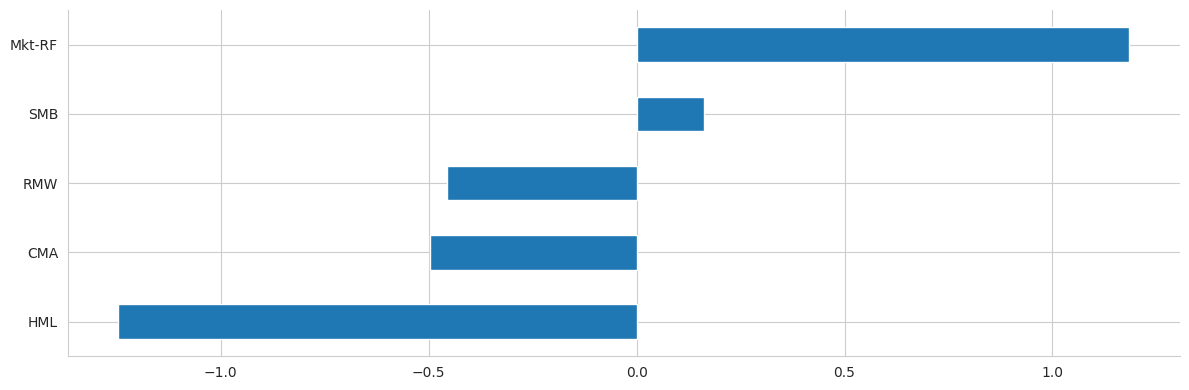

In [ ]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [ ]:
t = lambdas.mean().div(lambdas.std())
t

Mkt-RF    0.33
SMB       0.04
HML      -0.29
RMW      -0.15
CMA      -0.15
dtype: float64

###Results

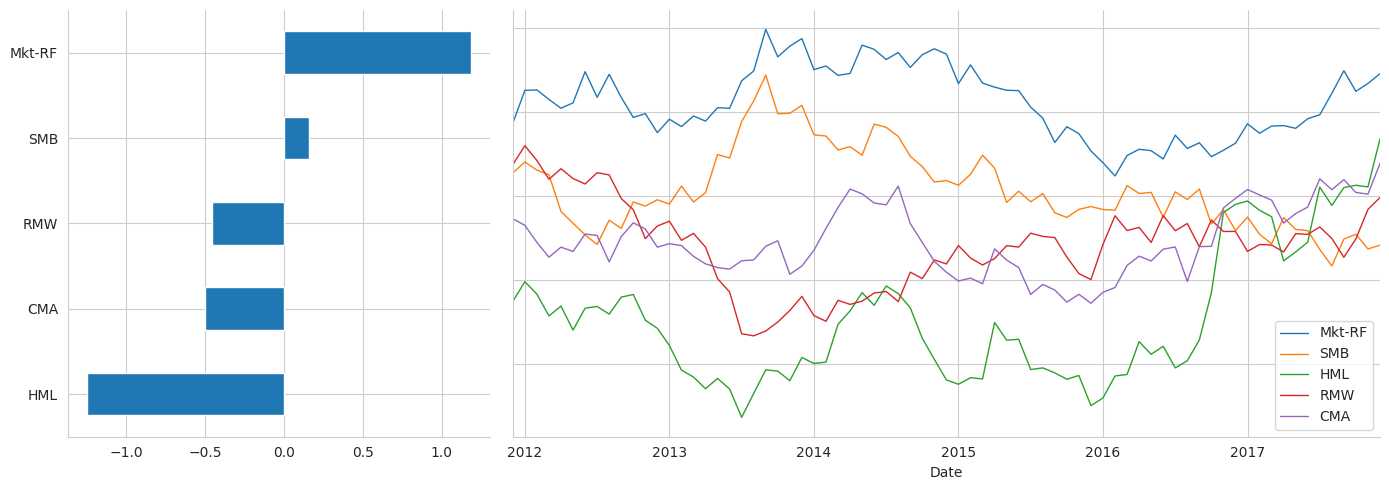

In [ ]:
window = 24  # months
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
lambdas.mean().sort_values().plot.barh(ax=ax1)
lambdas.rolling(window).mean().dropna().plot(lw=1,
                                             figsize=(14, 5),
                                             sharey=True,
                                             ax=ax2)
sns.despine()
plt.tight_layout()

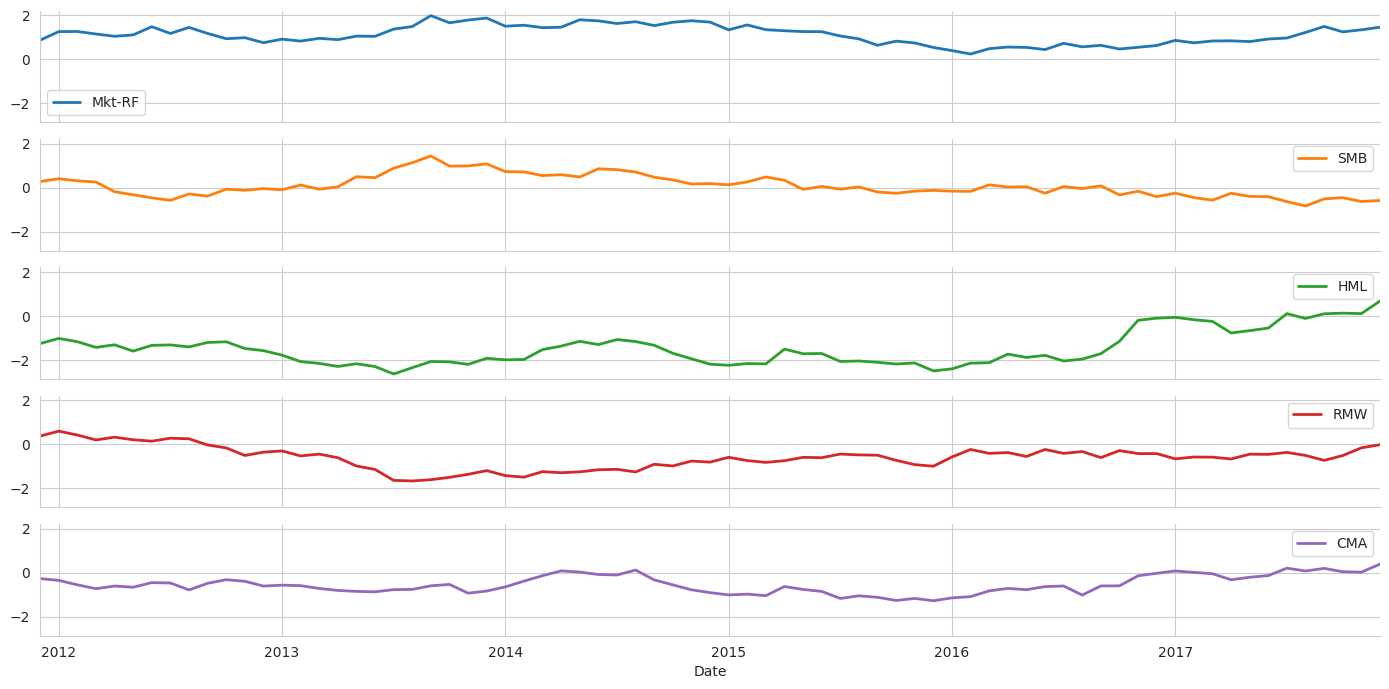

In [ ]:
window = 24  # months
lambdas.rolling(window).mean().dropna().plot(lw=2,
                                             figsize=(14, 7),
                                             subplots=True,
                                             sharey=True)
sns.despine()
plt.tight_layout()

#Fama-Macbeth with the LinearModels library
The linear_models library extends statsmodels with various models for panel data and also implements the two-stage Fama—MacBeth procedure:

In [ ]:
mod = LinearFactorModel(portfolios=ff_portfolio_data,
                        factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6896
No. Factors:                          5   J-statistic:                    15.950
No. Observations:                    96   P-value                         0.1935
Date:                  Sun, Jun 25 2023   Distribution:                 chi2(12)
Time:                          06:17:45                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1851     0.4124     2.8733     0.0041      0.3767      1.9934
SMB            0.1630     0.8724    

In [ ]:

print(res.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6896
No. Factors:                          5   J-statistic:                    15.950
No. Observations:                    96   P-value                         0.1935
Date:                  Sun, Jun 25 2023   Distribution:                 chi2(12)
Time:                          06:17:45                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1851     0.4124     2.8733     0.0041      0.3767      1.9934
SMB            0.1630     0.8724    

마지막으로 팩터 리스크 프리미엄 추정치를 얻고자 96기간의 평균을 구함

In [ ]:
lambdas.mean()

Mkt-RF    1.19
SMB       0.16
HML      -1.25
RMW      -0.46
CMA      -0.50
dtype: float64

#수축 방법을 사용한 선형 회귀 규제화

- 선형 회귀 모델을 훈현하기 위한 최소제곱법은 가우스-마르코프 가정이 충족될 때 최선의 편향 없는 선형 추정치를 산출

- 오차 공분산 행렬에 대한 OLS가정이 위반되는 경우에도 GLS와 같은 방법은 유사하게 잘 이뤄짐. 그러나 전반적으로 더 낮은 일반화 오류를 달성하고 분산을 줄이고자 편향된 계수를 생성하는 추정치가 있음

- 선형회귀 모델에서 많은 상관 변수가 포함돼 있는 경우 계수가 제대로 결정되지 않음
  - 이는 RSS에 대한 큰 양의 계수 영향을 상관 변수의 비슷한 음의 계수로 상쇄할 수 있기 때문
  - 결과적으로 높은 분산으로 인한 예측 오차의 리스크가 증가 -> 모델이 표본에 과도하게 적합할 수 있는 계수의 자유 재량권 때문
  

##1. 과대적합을 방지하는 방법
- 과대적합 방지 -> 규제화 기법(regultaization): 계수가 큰 값에 도달하지 못하도록 오차 함수에 페널티 항을 추가
- 계수에 대한 크기 제약은 표본 외 예측에 대한 잠재적으로 부정적인 영향을 완화할 수 있음

- 두 가지 동기를 다루는 수축 방법
  - 예측 정확도: 최소제곱 추정치의 낮은 편향을 갖고 있으나 높은 분산은 일부 계수를 0으로 수축하거나 설정해 일반화 오류를 줄일 수 있음을 시사 -> 모델의 분산을 감소시키고자 약간 더 높은 편차로 상쇄 가능
  - 해석: 예측 변수가 많으면 결과의 큰 그림에 대한 해석이나 의사소통이 복잡해짐 -> 모델을 가장 강한 효과를 가진 파라미터의 작은 하위 집합으로 제한하고자 세부 사항을 희생하는 것이 바람직 할 수 있음


- 수축 모델은 크기에 대해 페널티를 가함으로써 회귀 계수를 제한
  - 목표 함수에 S(B)항을 추가해 목표 달성
  - 이 항은 수축 모델의 계수가 RSS +계수의 크가와 양(+)으로 관련된 페널티를 최소화함을 암시
  - 추가된 페널티는 선형 회귀 계수를 일반적으로 다음과 같은 라그랑지안형태를 취하는 제한된 최소화 문제의 해결책이 되게 함
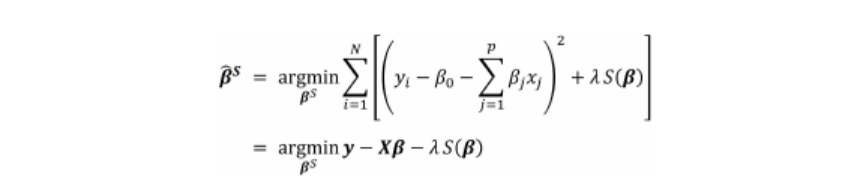

- 규제화 파라미터 Lamda
  - lambda값을 이용해 패널키 효과의 크기(규제화의 강도)를 결정
  - lamda가 양수가 되는 즉시 계수는 제약되지 않는 최소제곱 파라미터와 다르며, 이는 편향을 가진 추정치를 의미
  -lamda는 기대 예측 오차의 추정치를 최소화 하고자 교차 검증을 사용해 적응되도록 선택돼야 함

- 수축 모델은 S의 함수 형태(페널티 계산 방법)에 따라 다름
  - 가장 일반적인 버전은 ridge 회귀 분석과 lasso모델
  


###1) 리지 회귀 분석의 작동 방식
- 릿지 회귀는 제곱계수의 합에 해당하는 페널티를 목표 함수에 추가해 회귀 계수를 수축(L2규제화)
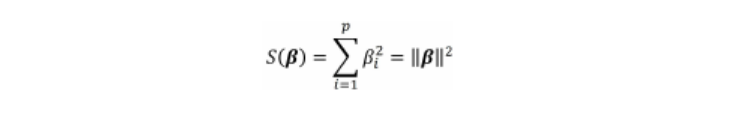
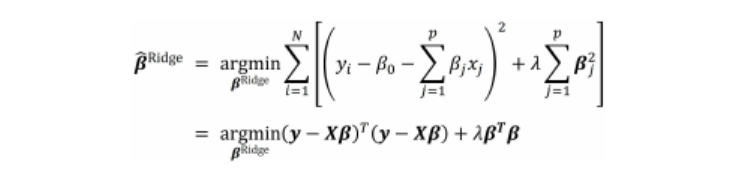

- 절편은 패널티로부터 제외돼 출력 변수에 대해 선택된 원점과 무관하게 프로스저를 만들지 않음.

- 리지 솔루션은 입력의 크기에 민감 -> 각 입력에서 해당 평균을 뺸 후, 결과를 입력의 표준 편차로 나눠 입력을 표준화하는 것이 중요

- OLS 경우와 유사하게 리지 추정치에 대한 닫힌 형식의 해도 있음
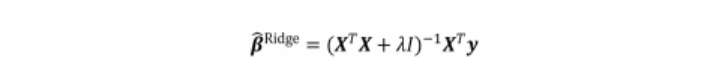

- 리지 패널티는 모든 파라미터가 비례적으로 수축됨 -> 직교 정규 입력의 경우 리지 추정치는 최소제곱 추정치의 측도화된 버전
- B^Ridge = B^LS/1+lambda


- 입력 행렬 X의 단수 값 분배(SVD)를 사용해 직교 정규가 아닌 더 일반적인 경우에서 수축이 입력에 어떻게 영향을 미치는지에 대한 통찰력을 얻을 수 있음

- 중심 행렬의 SVD는 데이터의 열 공간에서 분산의 내림차순으로 상관없는 방향을 포착하는 행렬의 주요 구성요소를 나타냄

- 리지 회귀 분석은 분산이 더 큰 방향과 상관되는 입력 변수보다 분산이 적은 데이터의 방향과 관련된 입력 변수의 계수를 수축함
- 암묵적 가정: 가장 많이 변화하는 데이터의 방향이 출력을 예측할 때 가장 영향력 있거나 가장 신뢰할 수 있다


###2) 라쏘 회귀 분석의 작동방식
- 라쏘: 잔차 제곱의 합에 패널티를 추가해 계수를 수축시키지만 라쏘 패널티는 약간 다른 효과를 가짐

- 라쏘 패널티: L1 규제화에 해당하는 계수 벡터의 절댓값 합

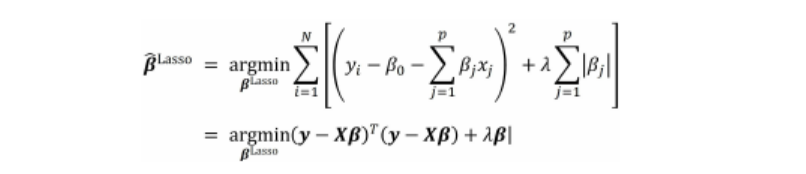

- 라쏘 패널티는 비선형 솔루션을 만들며 리지 회귀에서와 같이 계수에 대한 폐쇄형 해가 존재하지 않음

- 대신 라쏘 해법은 2차 프로그래밍 문제이며 리지 회귀와 동일한 계산 비용으로 lamda의 서로 다른 값을 초래하는 계수의 전체 경로를 계산하는 효율적 알고리즘이 있음

- 라쏘 패널티는 규제화가 증가함에 따라 일부 계수는 점차 0으로 감소하는 효과를 가짐 -> 특성 하위 집합을 연속적으로 선택하는 데 사용 가능


## 선형 회귀로 수익률을 예측하는 방법
- 수축이 있거나 없는 회귀 분석을 사용해 수익률을 예측하고 신호를 생성

###1) 모델 특성과 선도 수익률 준비
- 주식의 유니버스와 기간을 선택
- 특성으로 사용할 알파 팩터를 구축하고 변환
- 예측하고자 하는 미래 수익률을 계산
- (잠재적으로) 데이터 정제

####1. 투자 유니버스 생성
- 2013년부터 2017년까지의 퀀들 위키 미국 주식 가격 데이터 세트의 월별 주식 데이터 사용

- 일별 OHLCV(시초가, 고가, 저가, 종가, 거래량), 섹터 정보를 포함하는 메타 데이터를 로딩
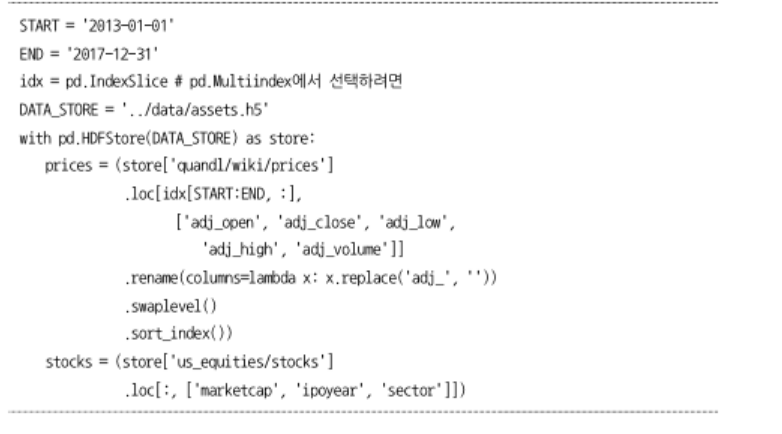

- 적어도 2년 이상의 데이터가 없는 티커는 제거
- 섹터 이름을 정리하고 가격과 섹터 정보가 모두 포함된 주식만 사용
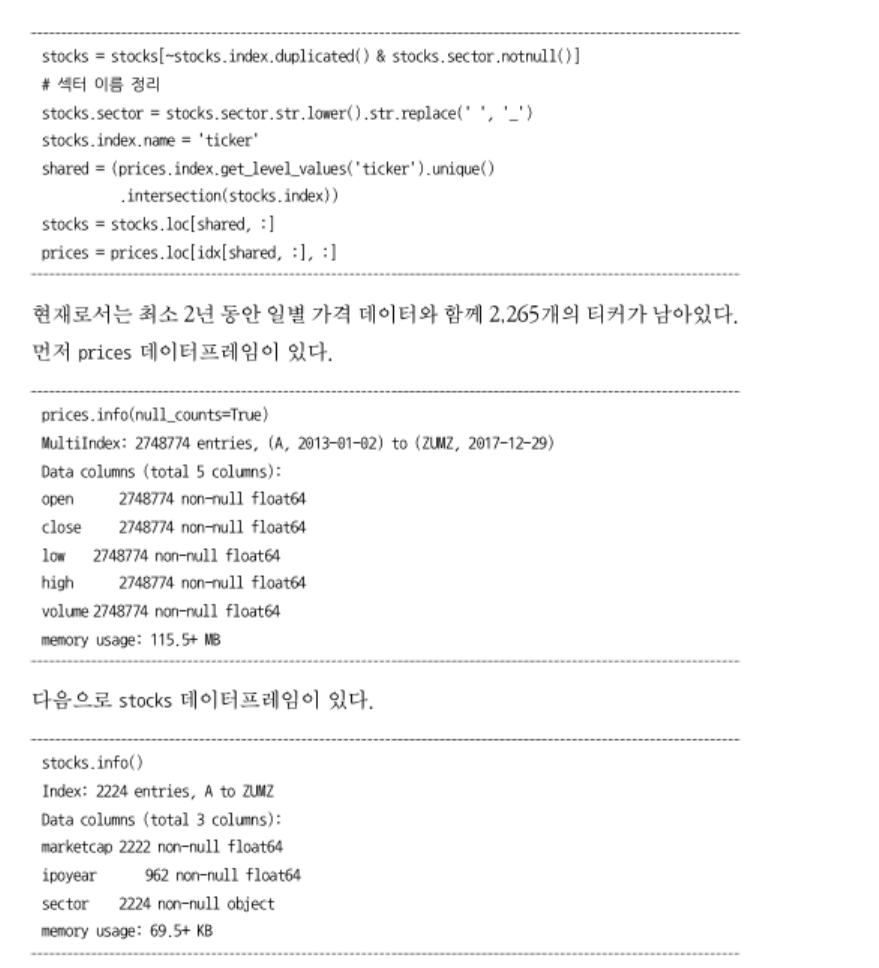

- 모델에 가장 유동적인 주식을 선택하고자 거래된 달러 거래량의 21일 롤링 평균을 사용
- 주식수를 제한하면 훈련과 백테스팅 시간을 줄이는 이점도 있음 -> 달러 거래량이 적은 주식을 제외하면 가격 데이터의 잡음을 줄일 수 있음
- 계산을 위해 일별 종가에 해당 거래량을 곱한 후 groupby()를 사용해 각 티커에 롤링 평균을 적용

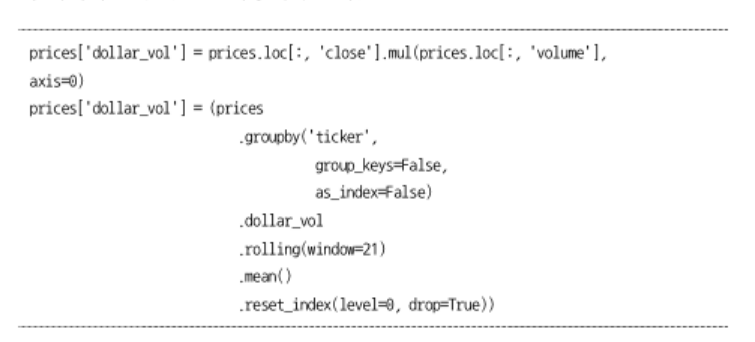


- 그런 다음 이 값을 사용해 각 날짜에 대한 주식의 순위를 메김
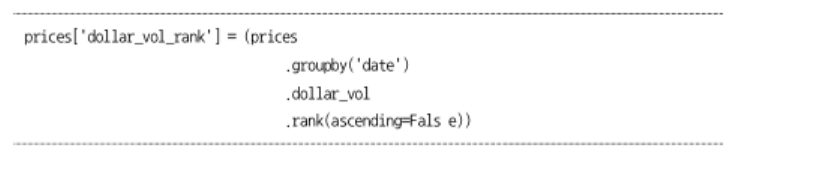

##TA-Lib을 사용해 알파 팩터 선정과 계싼
- TA-LIb을 사용해 몇가지 모멘텀과 변동성 팩터를 생성
- 상대 강도 지수(RSI)를 추가


In [ ]:
prices['rsi'] = prices.gourpby(level='ticker').close.aply(RSI)

- 간단한 평가로 가장 많이 거래된 100개 주식의 경우 평균과 중앙값 5일 미래 수익률이 RSI값에서 실제로 감소하고 있으며, 일반적으로 30/70 매수/매도 임곗값을 반영하도록 그룹화 되어있음
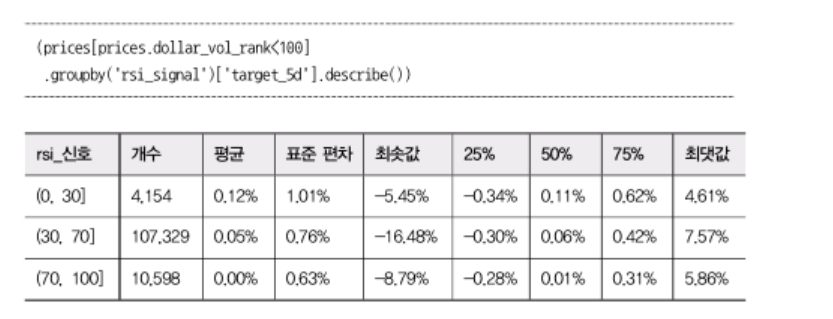

- 이후 볼린저 밴드를 계산
- TA-Lib BBANDS 함수는 세개의 값을 반환 하므로 groupby() 및 apply()와 함께 사용하고자 더 높은 밴드와 더 낮은 밴드의 DataFrame을 반환하는 함수를 설정

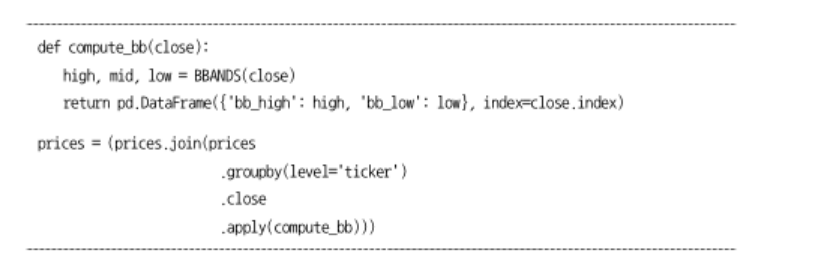

- 주가와 상위, 하위 볼린저 밴드 사이의 백분율 차이를 갖고 분포를 압축하고자 로그를 취함
- 목표는 최근 변동성 추세와 비교해 현재 값을 반영하는 것

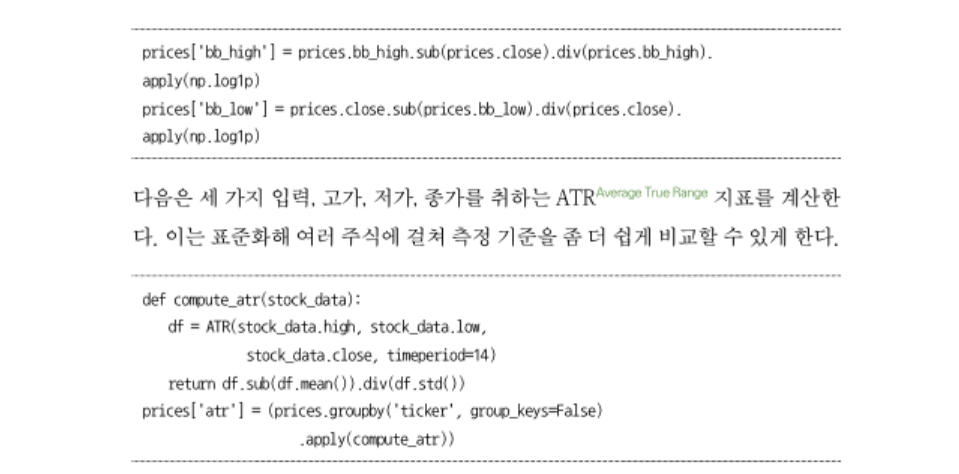

- 마지막으로 MACD 지표를 생성하는데, 이는 좀 더 짧은 기간과 자기 지수 이동 평균 간의 차이를 반영
- 다양한 예측 기간에 대한 예측을 테스트해서 정보 계수로 측정된 최상의 예측 가능성을 생성하는 최상의 보유기간을 식별
- 좀 더 구체적으로, 내장된 수익률 함수를 사용해 1일, 5일, 10일, 20일 동안의 수익을 계산해 2년간 100개 주식의 유니버스에 대해 50000개 이상의 관측치를 산출

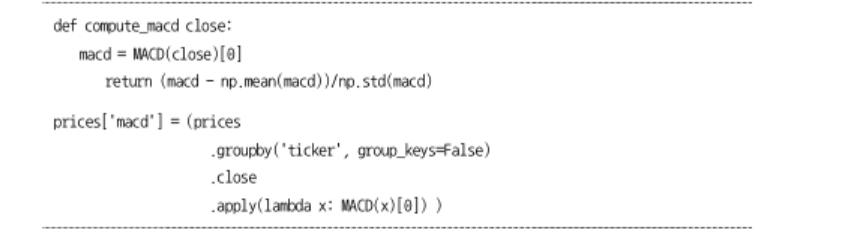

###시차 수익률 추가
- 다양한 과거 시차에 대한 가격 추세를 포착하고자 해당 수익률을 계산하고 결과를 일별 기하평균으로 변환
- 1일, 1주, 1,2,3개월 시차를 사용
- 또한 0.01번째 및 99.99번째 백분위수의 값을 잘라내 수익률을 윈저라이징함


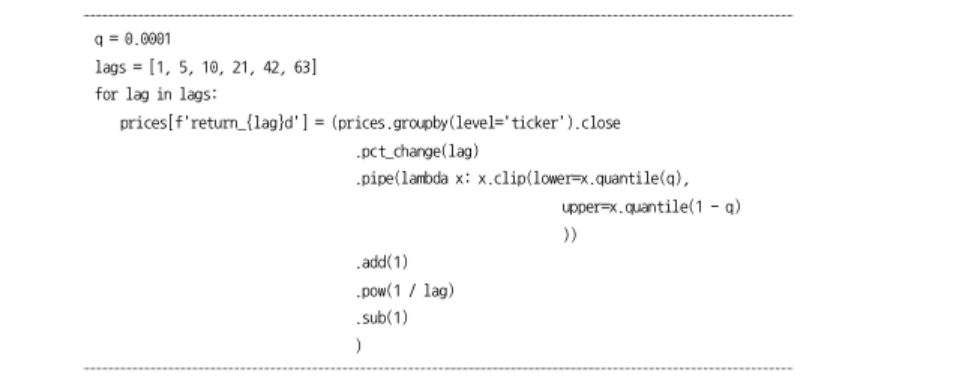

- 그런 다음 현재 관측치에 대해 특성으로 사용하고자 일별, 주별, 월별 수익률로 변환
- 이 기간 동안에 대한 최신 수익률에 추가해 이전 5가지 결과도 이용
- 예를 들어 이전 5주 동안의 주간 수익률을 이동해 현재 관측치와 맞춰 조정하고 현재 미래 수익률 예측에 사용할 수 있음


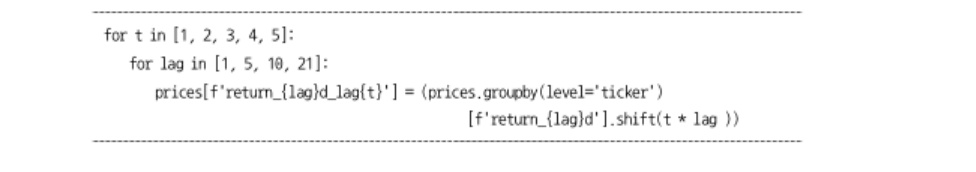

### 목표 미래 수익률 생성
- 다양한 예측 기간에 대한 예측을 테스트
- 목표는 정보 계수(IC)로 측정되는 최상의 예측 정확도를 산출하는 보유기간을 식별하는 것
- 시간 범위 t에 대한 수익률을 t일 뒤로 이동해 이를 미래 수익률로 사용(ex. 5일 수익률을 t0에서 t0로 5일 뒤로 이동해 이 값이 t0에 대한 모델 목표가 되게 함


In [ ]:
for t in[1,5,10,21]:
  prices[f'target_{t}d'] prices.groupby(level='ticker')[f'return_{t}d']
shif t(-t)

###범주형 변수의 더미 인코딩
- 회귀 분석이 처리될 수 있게 범주형 변수를 숫자 형식으로 변환할 필요가 있음
- 이를 위해 각 범주 수준에 대해 개별 열을 생성, 원래 범주 열에서 이 수준의 존재를 1과 0으로 지정하는 더미 인코딩을 사용
- get_dummies()함수는 더미 인코딩을 자동화함
- 유형의 열을 감지하고 적절하게 변환(ex. 정수가 들어있는 열에 대해 더미변수가 필요한 경우 키워드 열을 사용해 식별가능)

In [ ]:
df = pd.DataFrame({'categories':['A','B','C']})
#categories
#0 A
#1 B
#2 C

pd.get_dummies(df)
#categores_A categorise_B categories_C
#0  1  0  0
#1  0  1  0
#2  0  0  1

- 모든 범주를 더미 변수로 변환하고 절편으로 모델을 추정할 때 실수로 다중 공선성이 생성
- 행렬은 이제 중복 정보를 포함하며 더 이상 전체 순위를 갖지 않고 대신 단일 형태가 됨
- 이는 새 지표의 열을 제거해 회피할 수 있음
- 누락된 범주 수준의 계수는 이제 절편에 의해 포착됨

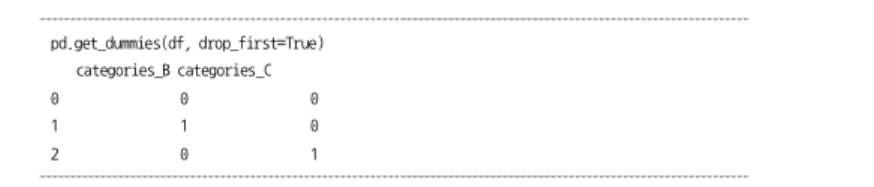

- 계절적 효과와 시장 상황을 포착하고자 연도와 월에 대한 시간 지표 변수를 생성

In [ ]:
prices['year'] prices.index.get_level_values('date').year
prices['month'] prices.index.get_level_values('date').month

- 그런 다음 가격 데이터를 섹터 정보와 결합하고 시간 및 섹터 범주에 대한 더미 변수를 만듬


In [ ]:
prices = prices.join(stocks[['sector']])
prices = pd.get_dummies(prices,
                        columns = ['year', 'month', 'sector'],
                        prefix = ['year','month', ''],
                        prefix_sep=['_','_',''],
                        drop_first=True)

- 그 결과 앞 절에서 다룬 다양한 회귀 모델과 함께 사용할 수 있는 약 50개의 특성을 얻음


##Statsmodels를 사용한 선형 OLS회귀분석
-  statmodels를 사용해 주식 수익률 데이터로 통계적 추론을 실행하는 방법과 결과를 해석하는 방법 시연

###관련 유니버스 선택
- 달러 거래량의 순위 롤링 평균을 기준으로 표본의 특정 거래일에 대해 상위 100개의 주식을 선택


In [7]:
data =data[data.dollar_vol_rank<100]

NameError: ignored

In [ ]:
#결과 변수와 특성을 생성
y = data.filter(like='target')
x = data.drop(y.colum ns, axis=1)

### 표준형 OLS회귀 분석 추정
- statmodels로 OLS를 사용해 선형 회귀 모델을 추정할 수 있음
- 예를 들어 5일 보유 기간에 대해 미래 수익률을 선택하고 그에 따른 모델을 적합시킴


In [ ]:
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
trained_mod el.summary()

###진단 통계량
- 전체 요약 결과물을 볼 수 있지만 수많은 특성을 고려할 떄 지면의 공간을 절약하려고 진단 통계만을 표시
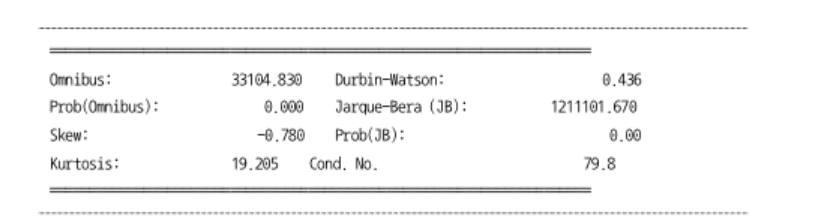

- 진단 통계는 자크-베라 통계에 대한 낮은 p-값을 고려할 때 잔차가 정규 분포를 따르지 않는다는 것을 시사.
- 즉 음의 왜도와 높은 첨도를 나타냄
- 그림의 왼쪽 패널은 정규 분포 대 잔차 분포를 표시하고 차이를 보여줌(정규보다 더 큰 오차를 범하고 있음을 의미)
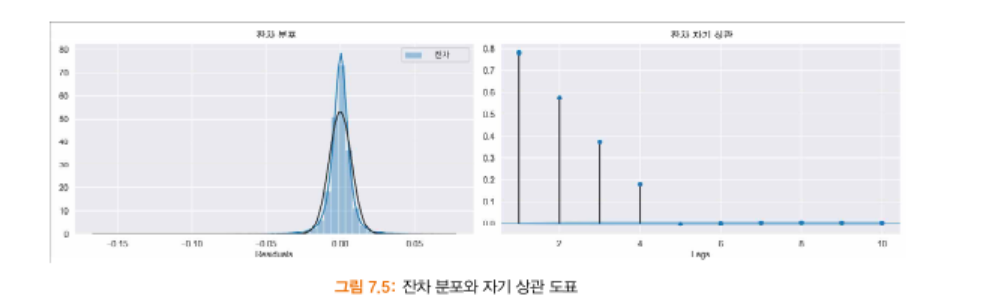

- 더빈-왓슨 통계량은 0.43으로 낮으므로 5% 수준에서 자기상관이 없다는 귀무가설을 쉽게 기각함
- 따라서 잔차가 양의 상관관계를 가질 수 있음
- 오른쪽 패널은 처음 10개의 시차에 대한 자기 상관계수를 표시해 시차 4까지의 유의한 상관관계를 나타냄
- 즉 연속된 날의 결과에 4개의 동일한 수익이 포함되도록 매일 5일 수익률을 예측함
- 목표가 미래 수익률과 크게 관련된 팩터를 이해하는 것이라면 강건한 표준 오차를 사용해 회귀 분석을 실행하거나 다른 방법을 함꼐 사용(더 복잡한 오차 공분산을 허용하는 패널 모델,,)



##사이킷런을 이용한 선형 OLS회귀
- sklearn은 예측에 맞게 조정됐으므로 교차 검증을 사용한 예측 성과를 기반으로 선형 회귀 모델을 평가하게 됨

###특성과 타깃 선택
- 실험을 위해 유니버스를 선택해 특정 날짜에 달러 가치 측면에서 가장 많이 거래된 100개의 주식 티커로 제한
- 표본에는 2013~2017년 까지의 5년간의 데이터가 포함

###모델 교차 검증
- 우리의 데이터는 각 증권에 대해 하나씩 수많은 시계열로 구성됨
- 시계열과 같은 순차 데이터는 부주의로 선견 편향이나 누출이 발생하지 않도록 설정하고자 신중한 교차검증이 필요
- MultipleTimeSeivesCV클래스를 사용
- 훈련 및 테스트 기간 동안 원하는 길이, 실행하려는 테스트 기간의 수, 예측 기간의 수를 초기화
- split()메서드는 훈현 쌍과 테스트 지표를 산출하는 수익률 생성기로 결과와 특성을 선택하는 데 사용 가능
- 쌍의 수는 파라미터 n_splits에 따라 다름
- 테스트 기간은 겹치지 않으며 데이터에서 이용할 수 있는 기간의 마지막에 위치
- 테스트 기간에 사용된 후에는 롤 포워드되고 크기가 일정하게 유지되는 훈련 데이터의 일부가 됨

In [ ]:
class MultipleTimeSeriesCV:
    """Generates tuples of train_idx, test_idx pairs
    Assumes the MultiIndex contains levels 'symbol' and 'date'
    purges overlapping outcomes"""

    def __init__(self,
                 n_splits=3,
                 train_period_length=126,
                 test_period_length=21,
                 lookahead=None,
                 shuffle=False):
        self.n_splits = n_splits
        self.lookahead = lookahead
        self.test_length = test_period_length
        self.train_length = train_period_length
        self.shuffle = shuffle

    def split(self, X, y=None, groups=None):
        unique_dates = X.index.get_level_values('date').unique()
        days = sorted(unique_dates, reverse=True)

        split_idx = []
        for i in range(self.n_splits):
            test_end_idx = i * self.test_length
            test_start_idx = test_end_idx + self.test_length
            train_end_idx = test_start_idx + + self.lookahead - 1
            train_start_idx = train_end_idx + self.train_length + self.lookahead - 1
            split_idx.append([train_start_idx, train_end_idx,
                              test_start_idx, test_end_idx])

        dates = X.reset_index()[['date']]
        for train_start, train_end, test_start, test_end in split_idx:
            train_idx = dates[(dates.date > days[train_start])
                              & (dates.date <= days[train_end])].index
            test_idx = dates[(dates.date > days[test_start])
                             & (dates.date <= days[test_end])].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [ ]:
train_period_length = 63
test_period_length = 10
n_splits = int(3 * YEAR/test_period_length)
lookahead =1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

- 교차 검증 루프는 TimeSeriesCV에서 제공되는 훈련 및 테스트 인덱스를 반복하고, 특성과 결과를 선택하고, 모델을 훈련해서 테스트 특성에 대한 수익률을 예측함
- 또한 실제 값과 예측값 사이의 평균 제곱근 오차와 스피어만 순위 상관계수를 포착

In [ ]:
%%time
target = f'target_{lookahead}d'
lr_predictions, lr_scores = [], []
lr = LinearRegression()
for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]
    lr.fit(X=X_train, y=y_train)
    y_pred = lr.predict(X_test)

    preds = y_test.to_frame('actuals').assign(predicted=y_pred)
    preds_by_day = preds.groupby(level='date')
    scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                               x.actuals)[0] * 100)
                        .to_frame('ic'),
                        preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                y_true=x.actuals)))
                        .to_frame('rmse')], axis=1)

    lr_scores.append(scores)
    lr_predictions.append(preds)

lr_scores = pd.concat(lr_scores)
lr_predictions = pd.concat(lr_predictions)

### 결과 평가: 정보 계수와 RMSE
- 유니버스에 대해 3년간의 일별 테스트 예측을 포착
- 모델의 예측 성과를 평가하고자 모든 예측을 통합해 전체 기간뿐만 아니라 각 거래일에 대한 정보 계수를 계산할 수 있음
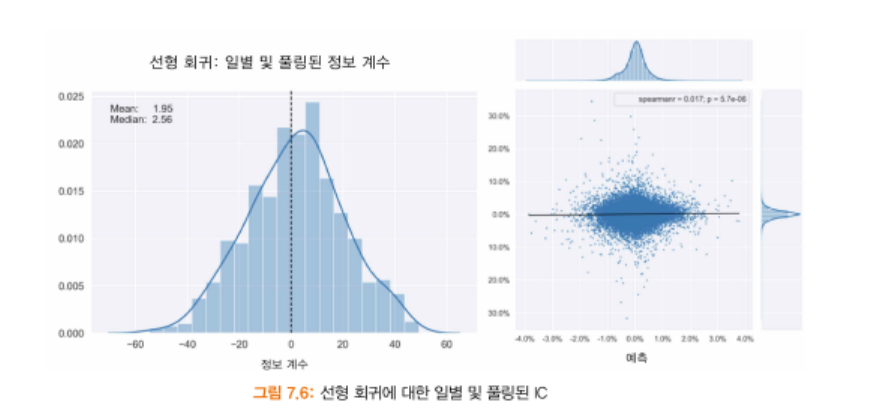

- 그림의 왼쪽 패널은 매일 계산된 순위 상관계수의 분포를 보여주고 평균과 중앙값은 각각 1.95와 2.56을 보여줌
- 오른쪽 패널은 모든 테스트 기간에 걸쳐 예측된 일일 수익률과 실제 일일 수익률의 산점도를 보여줌
- jointplot은 낮은 가중치를 특이값에 할당하고 작은 양의 관계를 보여주는 강건한 회귀 분석을 추정
- 전체 3년 기간에 대한 실제 및 예측 수익률의 순위 상관관계는 양수지만 0.017로 낮으며 통계적으로 의미가 있음
- 추가적으로 일별 기준으로 정보계수에 관해 어떻게 예측이 수행되는지 추적할 수 있음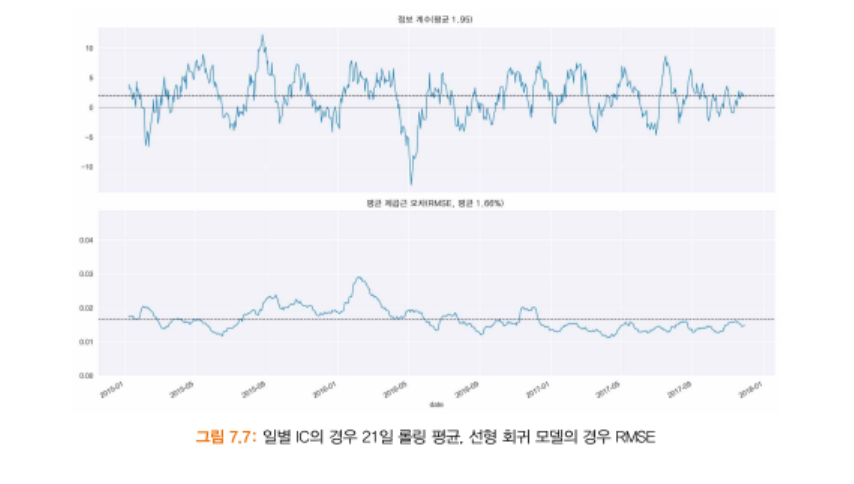
-

- 그림 7.7은 일별 정보 계수와 RMSE둘 다에 대한 21일 롤링 평균을 보여줌
- 이 관점은 전체 기간에 대한 작은 양의 정보 계수가 -10에서 +10까지의 범위로 상당한 변동을 숨긴다는 것을 보여줌


##사이킷런을 이용한 리지 회귀 분석
- 이제 규제화된 리지 모델로 이동하는데, 파라미터 제약 조건이 선형 회귀의 예측 성과를 개선시키는지 여부를 평가하는 데 사용됨
- 리지 모델을 사용하면 모델의 목적 함수에 패널티 항의 가중치를 결정하는 하이퍼 파라미터를 선택가능

### 교차 검증을 사용해 규제화 파라미터 조정
- 리지 회귀의 경우 키워드 alpha로 규제화 파라미터를 조정할 필요가 있음(lambda)
- 10^-4에서 10^4까지 18개의 값을 시도(값이 클수록 더 강력한 규제화를 의미)



In [8]:
ridge_alphas = np.logspace(-4, 4, 9)
ridge_alphas = sorted(list(ridge_alphas) + list(ridge_alphas * 5))

- 선형 회귀에서와 같이 동일한 교차 검증 파라미터를 적용(일별 수익률의 10일간을 예측하고자 3개월 동안 훈련)

- 리지 패널티의 크기 민감도는 StandardScaler를 사용해 입력을 표준화할 필요가 있음
- fit_transform() 메서드를 사용해 훈련 세트로부터 평균과 표준 편차를 학습하고 이 학습 파라미터를 transform()메서드를 사용해 테스트 세트에 적용
- 전처리를 자동화하고자 Pipeline을 생성, 리지 계수 수집

In [ ]:
%%time
ridge_coeffs, ridge_scores, ridge_predictions = {}, [], []

for alpha in ridge_alphas:
    print(alpha, end=' ', flush=True)
    start = time()
    model = Ridge(alpha=alpha,
                  fit_intercept=False,
                  random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])

    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')], axis=1)

        ridge_scores.append(scores.assign(alpha=alpha))
        ridge_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)
    ridge_coeffs[alpha] = np.mean(coeffs, axis=0)

print('\n')

### 교차 검증 결과와 리지 계수 경로
- 규제화가 증가될수록 바뀌는 것을 시각화하고자 개별 하이퍼 파라미터 값에 대해 정보계수를 그래프로 그림
- lambda = 100에 대해 가장 높은 평균과 중앙 IC값을 얻음

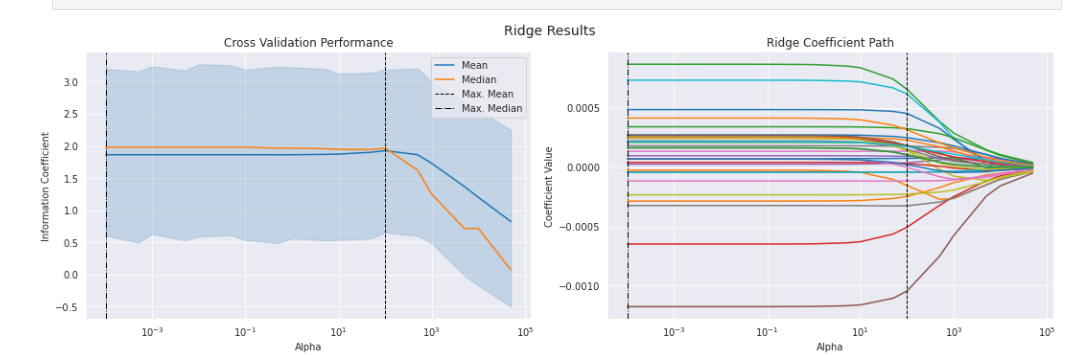

- 오른쪽 패널은 규제화 정도를 나타냄. 이 계수는 거의 제약되지 않은 모델 lambda=10^-4에 비해 약간 수축 됐음을 보여줌
- 왼쪽 패널은 예측 정확도가 최적의 규제화에 대한 평균 및 중앙 IC값 측면에서 약간만 증가한다는 것을 보여줌

### 상위 10위 계수
- 계수의 표준화를 통해 절대적 크기를 비교해 상대적인 중요도에 대한 결론을 끄집어낼 수 있음

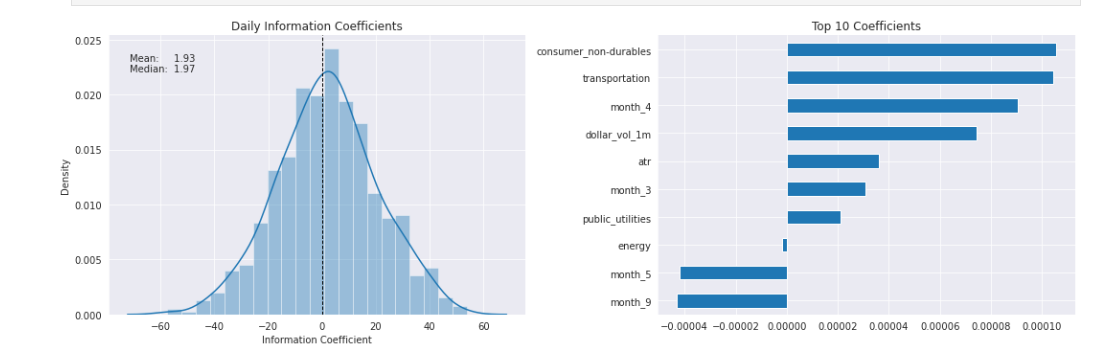

- 위 그림은 훈련된 모델에 대한 평균을 낸 lamda=100을 사용한 규제화에 대해 가장 관련성이 높은 10가지 계수를 보여줌
- 이 간단한 모델과 동일 기간에 대해 시차 월별 수익률과 다양한 섹터 지표는 가장 중요한 역할을 함

#Sklearn을 이용한 라쏘 회귀 분석
- 라쏘는 반복 좌표 하강법을 사용해 해결책에 도달해야 하는 반면 리지는 폐쇄형 공식에 의존할 수 있음

###라쏘 모델 교차검증
- 교차검증 코드는 Pipeline설정에 관해서만 다름
- Lasso 객체를 사용하면 허용오차와 최대 반복 횟수를 설정해 수렴됐는지, 중단해야 하는지를 결정할 수 있음
- warm_start를 사용하면 다음 훈련이 마지막 최적 게수 값에서 시작할 수 있음
- 10^-10에서 10^-3까지의 범위에서 8개의 alpha값을 사용


In [9]:
%%time

lasso_coeffs, lasso_scores, lasso_predictions = {}, [], []
for alpha in lasso_alphas:
    print(alpha, end=' ', flush=True)
    model = Lasso(alpha=alpha,
                  fit_intercept=False,  # StandardScaler centers data
                  random_state=42,
                  tol=1e-3,
                  max_iter=1000,
                  warm_start=True,
                  selection='random')

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])
    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        t = time()
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')],
                           axis=1)

        lasso_scores.append(scores.assign(alpha=alpha))
        lasso_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)

    lasso_coeffs[alpha] = np.mean(coeffs, axis=0)

NameError: ignored

###결과 평가: 정보 계수와 라쏘 경로
- 교차 검증 중 사용된 모든 테스트 세트에 대한 평균 정보 계수를 그래프로 표시할 수 있음
- 규제화가 제약이 없는 모델에 비해 IC를 개선해 lamda = 10^-4수준에서 최상의 결과를 얻을 수 있음을 다시 알 수 있음
- 패널티는 상대적으로 작은 계수의 제곱 값이 아니라 절댓값의 합으로 구성되므로 최적의 규제화 값은 리지 회귀 분석과는 상당히 다름


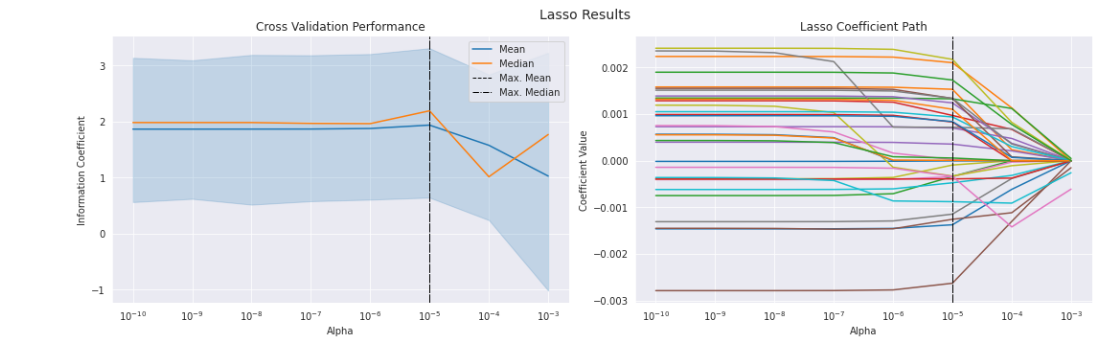

- 이 경우 평균 및 중앙값 IC 계수는 라쏘 회귀 분석에 대해 다소 더 높으며 가장 좋은 성과를 내는 모델은 평균적으로 다른 계수의 세트를 사용함

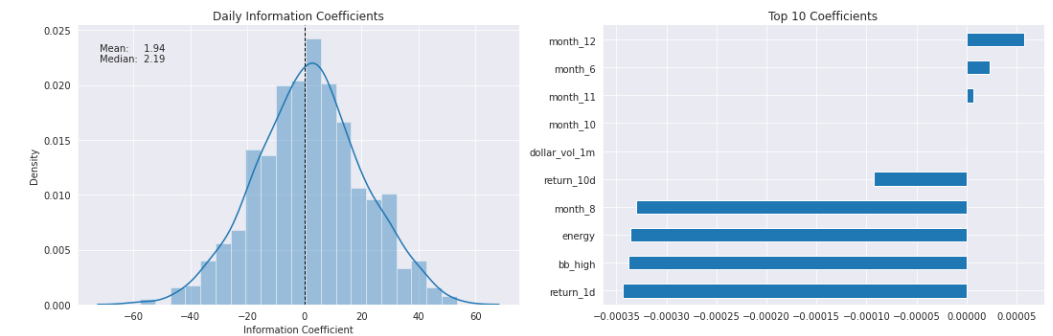

## 예측 신호의 품질 비교
- 리지 회귀 분석과 라쏘 회귀 분석은 유사한 결과가 종종 나타남
- 리지 회귀에서는 계산을 더 빨리 하는 경우가 많지만 라쏘 회귀에서는 계수를 점차 0으로 줄여 특성을 제거해 연속적인 특성 하위 집합 선택을 제공
- 이 특정 설정에서 라쏘 회귀 분석은 아래 그림에 표시된 것 처럼 최고의 평균과 중앙 IC 값을 생성


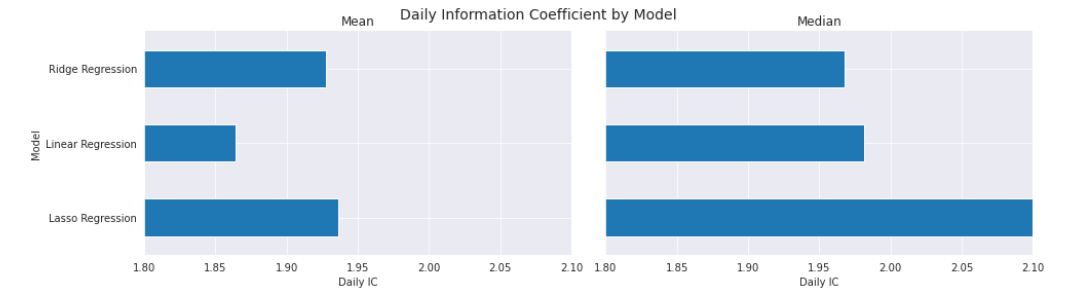

- 또한 알파렌즈를 사용해 모델 예측의 신호 품질을 반영하는 시각화와 다양한 측정 지표를 계산할 수 있음
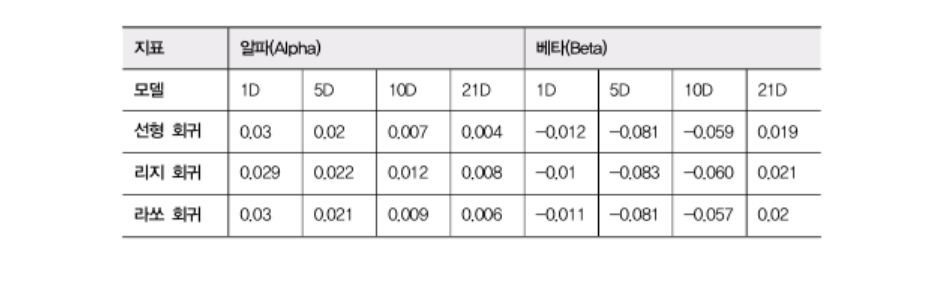

-  위 표는 모델 예측의 오분위수에 따라 투자된 포트폴리오에 대해 알파와 베타 값을 보여줌